#### Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("data\\data.xlsx")
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :9720


In [3]:
df = df[df["LMTD"] > 0]
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :8480


In [4]:
# Drop the data points with non positive chilling Duty
df = df[df["LA Chilling Duty"] >= 0]
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :5704


In [5]:
df["SCD (MJ/kg)"] = (0.001 * df["LA Chilling Duty"]) / df["Captured CO2 (kg/h)"]

## Exploring the data

In [6]:
df.columns

Index(['State', 'FG Massflow (kg/h)', 'Flue gas CO2 cons', 'FG Temperature',
       'Lean Amine Mass flow (kg/h)', 'Lean Amine Temperature',
       'WWT Flow rate', 'WWB Flow rate', 'RA2Reg-Temperature',
       'Reboiler Duty (kJ/h)', 'LA Chilling Duty', 'WWT Cooling Duty',
       'WWT Cooling Duty2', 'MEA Emission PPM', 'CO2 Mass Flow @ Off Gas',
       'MEA Emission', 'FG Flue Rate (Sm3/h)', 'L/G (kg/kg)', 'L/G (kg/Sm3)',
       'Lean Loading', 'Captured CO2 (kg/h)', 'CO2 Capture Efficiency',
       'Rich Loading', 'RA Flow Rate', 'RA Temp after Abs', 'Reboiler Duty',
       'Condensor Duty (kJ/h)', 'SRD (MJ/kg CO2)', 'Condensor Specific Duty',
       'CO2 Product purity', 'CO2 Production Mass Flow', 'Reg Bttm Temp',
       'Reg Bttm Flow Rate', 'LA after HE', 'Left Min Apprch',
       'Right Min Appr', 'LMTD', 'MEA Makeup', 'Abs Height', 'SCD (MJ/kg)'],
      dtype='object')

In [7]:
df.describe().transpose()

count          mean           std           min  \
FG Massflow (kg/h)           5704.0  7.207411e+04  1.031939e+01  7.207000e+04   
Flue gas CO2 cons            5704.0  8.359599e-02  3.298276e-02  3.600000e-02   
FG Temperature               5704.0  3.695126e+01  1.178362e+01  2.000000e+01   
Lean Amine Mass flow (kg/h)  5704.0  1.351625e+05  8.233373e+04  4.160000e+04   
Lean Amine Temperature       5704.0  3.728787e+01  7.417124e+00  3.000000e+01   
WWT Flow rate                5704.0  5.500000e+04  0.000000e+00  5.500000e+04   
WWB Flow rate                5704.0  5.500863e+04  3.439796e+00  5.500000e+04   
RA2Reg-Temperature           5704.0  1.043051e+02  1.206691e+00  1.030000e+02   
Reboiler Duty (kJ/h)         5704.0  3.078945e+07  1.236984e+07  1.000000e+07   
LA Chilling Duty             5704.0  6.601097e+06  6.968066e+06  1.936000e+03   
WWT Cooling Duty             5704.0  3.128264e+06  1.346168e+06  3.070000e+05   
WWT Cooling Duty2            5704.0  4.359905e+06  1.451078e+06  6.506000e+05   
MEA Emission PPM             5704.0  1.613702e-01  3.216315e-01  1.726000e-04   
CO2 Mass Flow @ Off Gas      5704.0  2.207056e+03  1.994389e+03  1.221000e+01   
MEA Emission                 5704.0  1.613925e-07  3.217061e-07  1.726000e-10   
FG Flue Rate (Sm3/h)         5704.0  5.789569e+04  1.036741e+03  5.638000e+04   
L/G (kg/kg)                  5704.0  1.875638e+00  1.142761e+00  5.772000e-01   
L/G (kg/Sm3)                 5704.0  2.352114e+00  1.458413e+00  7.002000e-01   
Lean Loading                 5704.0  2.049223e-01  7.820774e-02  7.095000e-02   
Captured CO2 (kg/h)          5704.0  6.737296e+03  2.938513e+03  2.502000e+03   
CO2 Capture Efficiency       5704.0  7.700561e+01  1.879548e+01  2.872000e+01   
Rich Loading                 5704.0  4.699677e-01  3.968865e-02  3.232000e-01   
RA Flow Rate                 5704.0  1.404476e+05  8.445365e+04  4.316000e+04   
RA Temp after Abs            5704.0  3.836125e+01  7.370878e+00  2.088000e+01   
Reboiler Duty                5704.0  3.078945e+07  1.236984e+07  1.000000e+07   
Condensor Duty (kJ/h)        5704.0  1.284328e+07  6.109412e+06  2.917000e+06   
SRD (MJ/kg CO2)              5704.0  4.765017e+00  1.247572e+00  2.941000e+00   
Condensor Specific Duty      5704.0  2.081913e+00  1.090142e+00  1.120000e+00   
CO2 Product purity           5704.0  9.856748e-01  5.815067e-04  9.828000e-01   
CO2 Production Mass Flow     5704.0  6.781539e+03  2.959779e+03  2.515000e+03   
Reg Bttm Temp                5704.0  1.205428e+02  2.568666e+00  1.108000e+02   
Reg Bttm Flow Rate           5704.0  1.336667e+05  8.205559e+04  4.020000e+04   
LA after HE                  5704.0  5.040206e+01  9.103813e+00  2.997000e+01   
Left Min Apprch              5704.0  1.204087e+01  5.714874e+00  4.490000e-02   
Right Min Appr               5704.0  1.623721e+01  2.661992e+00  7.289000e+00   
LMTD                         5704.0  1.382633e+01  4.264904e+00  1.663000e+00   
MEA Makeup                   5704.0  1.354874e+00  3.618611e+00  0.000000e+00   
Abs Height                   5704.0  1.749404e+01  4.864350e+00  1.200000e+01   
SCD (MJ/kg)                  5704.0  8.970348e-01  7.206116e-01  2.281942e-04   

                                      25%           50%           75%  \
FG Massflow (kg/h)           7.207000e+04  7.207000e+04  7.207000e+04   
Flue gas CO2 cons            5.950000e-02  9.050000e-02  1.088000e-01   
FG Temperature               2.000000e+01  3.500000e+01  5.000000e+01   
Lean Amine Mass flow (kg/h)  8.120000e+04  1.010000e+05  1.670000e+05   
Lean Amine Temperature       3.000000e+01  4.000000e+01  4.000000e+01   
WWT Flow rate                5.500000e+04  5.500000e+04  5.500000e+04   
WWB Flow rate                5.501000e+04  5.501000e+04  5.501000e+04   
RA2Reg-Temperature           1.030000e+02  1.045000e+02  1.060000e+02   
Reboiler Duty (kJ/h)         2.000000e+07  3.000000e+07  4.400000e+07   
LA Chilling Duty             1.786000e+06  3.944500e+06  8.

In [8]:
df.groupby(["Flue gas CO2 cons"]).mean()["SRD (MJ/kg CO2)"]

Flue gas CO2 cons
0.0360    5.918239
0.0595    4.781794
0.0838    4.705801
0.0905    4.611641
0.1088    4.251134
0.1324    4.023896
Name: SRD (MJ/kg CO2), dtype: float64

In [9]:
df.groupby(["Flue gas CO2 cons", "Abs Height"]).std()["SRD (MJ/kg CO2)"]

Flue gas CO2 cons  Abs Height
0.0360             12            1.489780
                   18            1.405795
                   24            1.392912
0.0595             12            1.141965
                   18            1.198181
                   24            1.203629
0.0838             12            1.220313
                   18            1.225402
                   24            1.252473
0.0905             12            0.846821
                   18            0.793717
                   24            0.803286
0.1088             12            0.740948
                   18            0.698323
                   24            0.721084
0.1324             12            0.721200
                   18            0.697385
                   24            0.704601
Name: SRD (MJ/kg CO2), dtype: float64

In [10]:
df.groupby(["Flue gas CO2 cons"]).describe()[["CO2 Capture Efficiency","SRD (MJ/kg CO2)"]]

CO2 Capture Efficiency                               \
                                   count       mean        std    min   
Flue gas CO2 cons                                                       
0.0360                            1209.0  91.599926   9.425238  62.86   
0.0595                             867.0  71.267578  18.092525  39.40   
0.0838                             755.0  51.638927  14.298897  28.72   
0.0905                             916.0  85.807533  11.907557  53.81   
0.1088                             998.0  80.107766  14.740328  45.65   
0.1324                             959.0  72.129353  16.093976  38.30   

                                                   SRD (MJ/kg CO2)            \
                       25%     50%      75%    max           count      mean   
Flue gas CO2 cons                                                              
0.0360             88.6800  94.410  98.6500  99.69          1209.0  5.918239   
0.0595             56.1950  74.190  89.1450  99.40           867.0  4.781794   
0.0838             40.7100  50.450  62.5050  81.08           755.0  4.705801   
0.0905             79.0200  88.470  95.1900  99.47           916.0  4.611641   
0.1088             68.7825  83.555  93.1225  99.20           998.0  4.251134   
0.1324             59.2500  74.370  86.6600  97.79           959.0  4.023896   

                                                                     
                        std    min      25%     50%      75%    max  
Flue gas CO2 cons                                                    
0.0360             1.433304  3.262  4.77500  5.9180  7.13400  8.376  
0.0595             1.178407  3.135  3.86650  4.4600  5.14250  8.017  
0.0838             1.230397  3.124  3.79700  4.2760  5.10900  7.942  
0.0905             0.820614  3.088  3.90700  4.6205  5.41225  6.443  
0.1088             0.726061  2.946  3.69025  4.0680  4.63475  6.361  
0.1324             0.712473  2.941  3.56400  3.8750  4.22550  6.312

### Visualization

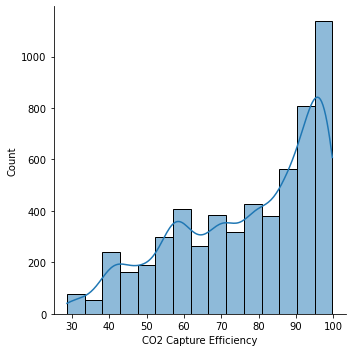

In [11]:
sns.displot(df["CO2 Capture Efficiency"], bins=15, kde=True)

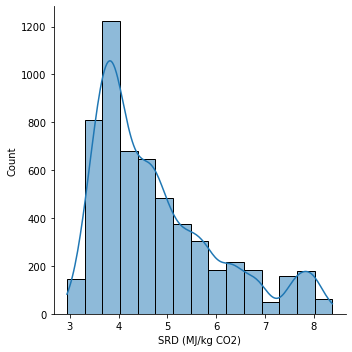

In [12]:
sns.displot(df["SRD (MJ/kg CO2)"], bins=15, kde=True)

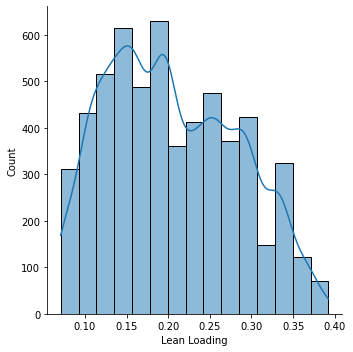

In [13]:
sns.displot(df["Lean Loading"], bins=15, kde=True)

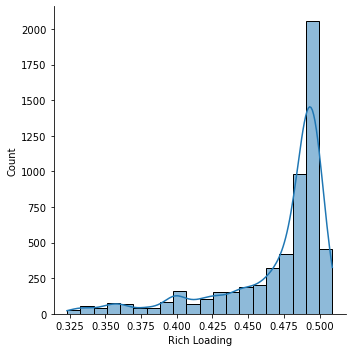

In [14]:
sns.displot(df["Rich Loading"], bins=20, kde=True)

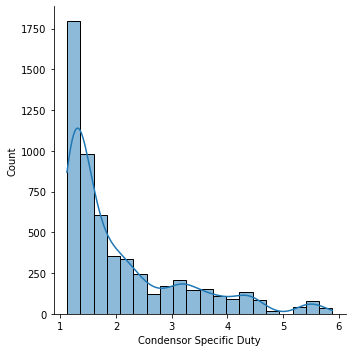

In [15]:
sns.displot(df["Condensor Specific Duty"], bins=20, kde=True)

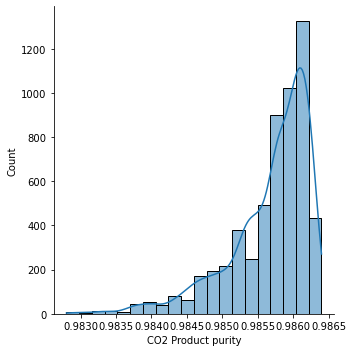

In [16]:
sns.displot(df["CO2 Product purity"], bins=20, kde=True)

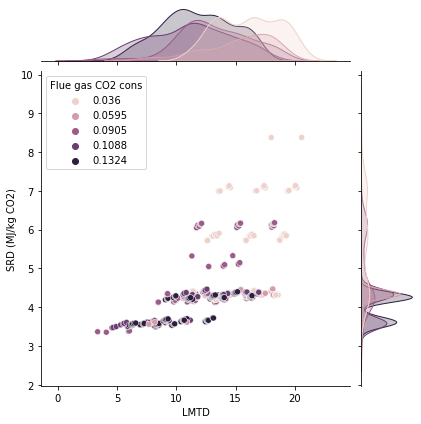

In [17]:
sns.jointplot(data= df[ (df["CO2 Capture Efficiency"] >= 85) & (df["CO2 Capture Efficiency"] <= 90)] , 
              x= "LMTD", 
              y="SRD (MJ/kg CO2)",
              hue="Flue gas CO2 cons",
              cmap="Blues"
             )

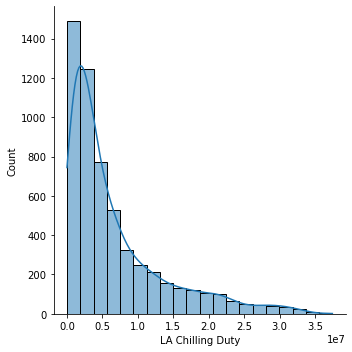

In [18]:
sns.displot(df["LA Chilling Duty"], bins=20, kde=True)

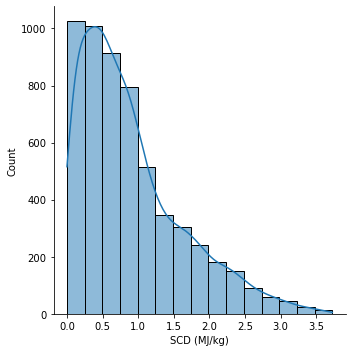

In [19]:
sns.displot(df["SCD (MJ/kg)"], bins=15, kde=True)

# Machine Learning

#### Import common Machine Learning Packages

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from joblib import dump, load

#### Define the inputs & outputs 

In [21]:
# XA Represents the data for Advanced Design
XA = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]

In [22]:
# X2 Represents the data for Naive Design
XN = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency']]

In [23]:
y = df[["SRD (MJ/kg CO2)", "Condensor Specific Duty", "SCD (MJ/kg)"]]

In [24]:
XA_train, XA_test, y_train, y_test = train_test_split(XA, y, test_size=0.30, random_state=211)
XN_train, XN_test, y_train, y_test = train_test_split(XN, y, test_size=0.30, random_state=211)

#### Define the dataframe function for performance evaluation

In [25]:
performance_SRD = pd.DataFrame(columns=["name","R^2_A", "MAE_A", "MAPE_A", "RMSE_A", "R^2_N", "MAE_N", "MAPE_N", "RMSE_N"])
performance_ConSD = pd.DataFrame(columns=["name","R^2_A", "MAE_A", "MAPE_A", "RMSE_A", "R^2_N", "MAE_N", "MAPE_N", "RMSE_N"])
performance_SCD = pd.DataFrame(columns=["name","R^2_A", "MAE_A", "MAPE_A", "RMSE_A", "R^2_N", "MAE_N", "MAPE_N", "RMSE_N"])

In [26]:
def evaldf_SRD(A_pred, N_pred, model_name):
    
    row = pd.DataFrame(
                        {
                         "name": str(str(model_name) + '_SRD'),
                         "R^2_A": r2_score(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0]),
                         "MAE_A": mean_absolute_error(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0]),
                         "MAPE_A": mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0]),
                         "RMSE_A": np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0])),
                         "R^2_N": r2_score(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]),
                         "MAE_N": mean_absolute_error(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]),
                         "MAPE_N": mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]),
                         "RMSE_N": np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]))
                        }
            , index=[0])
    
    global performance_SRD
    
    performance_SRD = pd.concat([performance_SRD, row], ignore_index=True)    

In [27]:
def evaldf_ConSD(A_pred, N_pred, model_name):
    
    row = pd.DataFrame(
                        {
                         "name": str(str(model_name) + '_ConsSD'),
                         "R^2_A": r2_score(y_test["Condensor Specific Duty"], A_pred[: , 1]),
                         "MAE_A": mean_absolute_error(y_test["Condensor Specific Duty"], A_pred[: , 1]),
                         "MAPE_A": mean_absolute_percentage_error(y_test["Condensor Specific Duty"], A_pred[: , 1]),
                         "RMSE_A": np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], A_pred[: , 1])),
                         "R^2_N": r2_score(y_test["Condensor Specific Duty"], N_pred[: , 1]),
                         "MAE_N": mean_absolute_error(y_test["Condensor Specific Duty"], N_pred[: , 1]),
                         "MAPE_N": mean_absolute_percentage_error(y_test["Condensor Specific Duty"], N_pred[: , 1]),
                         "RMSE_N": np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], N_pred[: , 1]))
                        }
            , index=[0])
        
    global performance_ConSD
    
    performance_ConSD = pd.concat([performance_ConSD, row], ignore_index=True)    

In [28]:
def evaldf_SCD(A_pred, N_pred, model_name):
    
    row = pd.DataFrame(
                        {
                         "name": str(str(model_name) + '_SCD'),
                         "R^2_A": r2_score(y_test["SCD (MJ/kg)"], A_pred[: , 2]),
                         "MAE_A": mean_absolute_error(y_test["SCD (MJ/kg)"], A_pred[: , 2]),
                         "MAPE_A": mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], A_pred[: , 2]),
                         "RMSE_A": np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], A_pred[: , 2])),
                         "R^2_N": r2_score(y_test["SCD (MJ/kg)"], N_pred[: , 2]),
                         "MAE_N": mean_absolute_error(y_test["SCD (MJ/kg)"], N_pred[: , 2]),
                         "MAPE_N": mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], N_pred[: , 2]),
                         "RMSE_N": np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], N_pred[: , 2]))
                        }
            , index=[0])
    
    global performance_SCD
     
    performance_SCD = pd.concat([performance_SCD, row], ignore_index=True)    

#### Define the ploting function

In [29]:
def plot_result(A_pred, N_pred):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)
    fig = plt.figure()

    axes[0,0].plot(np.arange(2,10), np.arange(2,10), color = "red")
    axes[0,0].scatter(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0])
    axes[0,1].plot(np.arange(2,10), np.arange(2,10), color = "red")
    axes[0,1].scatter(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0])

    axes[1,0].plot(np.arange(0,7), np.arange(0,7), color = "red")
    axes[1,0].scatter(y_test['Condensor Specific Duty'], A_pred[: , 1])
    axes[1,1].plot(np.arange(0,7), np.arange(0,7), color = "red")
    axes[1,1].scatter(y_test['Condensor Specific Duty'], N_pred[: , 1])

    axes[2,0].plot(np.arange(0,5), np.arange(0,5), color = "red")
    axes[2,0].scatter(y_test['SCD (MJ/kg)'], A_pred[: , 2])
    axes[2,1].plot(np.arange(0,5), np.arange(0,5), color = "red")
    axes[2,1].scatter(y_test['SCD (MJ/kg)'], N_pred[: , 2])
    plt.show()

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
LRmodelA = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()), ('LMA', LinearRegression())])).fit(XA_train, y_train)
LRmodelN = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()), ('LMN', LinearRegression())])).fit(XN_train, y_train)

In [32]:
LRmodelA_pred = LRmodelA.predict(XA_test)
LRmodelN_pred = LRmodelN.predict(XN_test)

In [33]:
evaldf_SRD(LRmodelA_pred, LRmodelN_pred, 'Linear_Regression')
evaldf_ConSD(LRmodelA_pred, LRmodelN_pred, 'Linear_Regression')
evaldf_SCD(LRmodelA_pred, LRmodelN_pred, 'Linear_Regression')

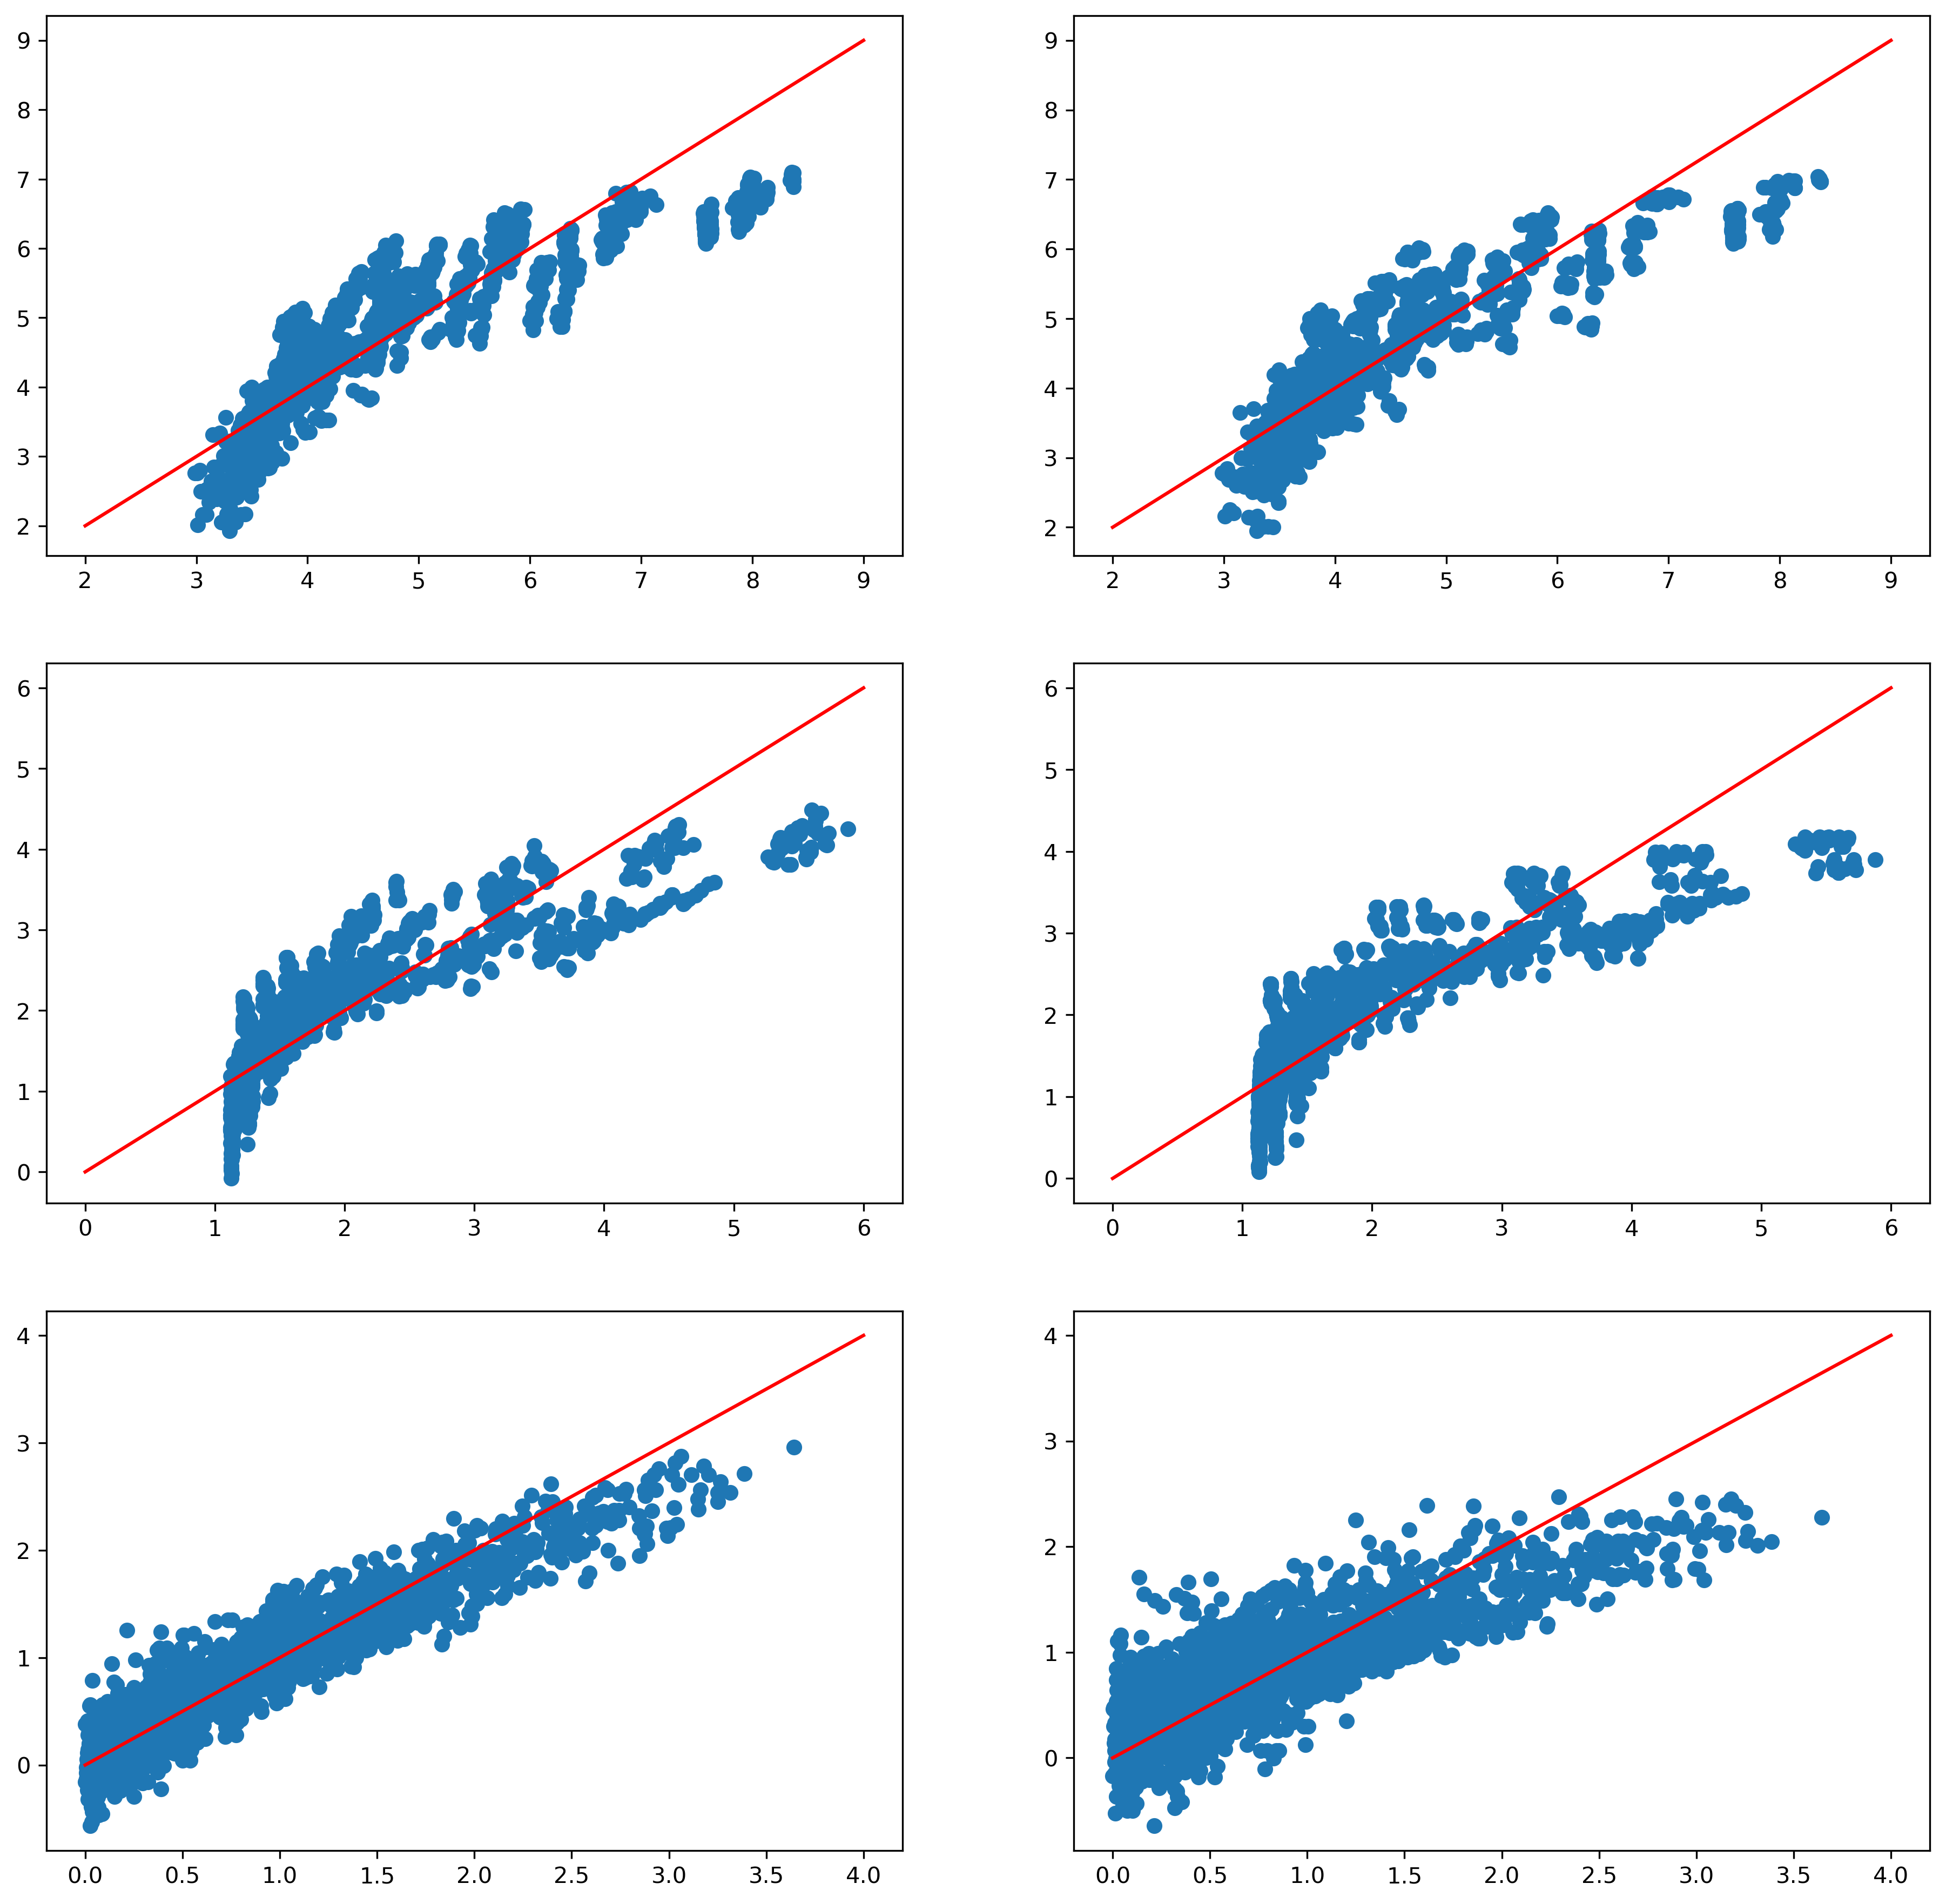

<Figure size 432x288 with 0 Axes>

In [34]:
plot_result(LRmodelA_pred, LRmodelN_pred)

## Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
PRmodelA = MultiOutputRegressor(Pipeline(steps=[('preprocessor', PolynomialFeatures(degree=5)),
                                                ('scaler', StandardScaler()),
                                                ('polyregA',LinearRegression())]
                                        )
                                ).fit(XA_train, y_train)

PRmodelN = MultiOutputRegressor(Pipeline(steps=[('preprocessor', PolynomialFeatures(degree=5)),
                                                ('scaler', StandardScaler()),
                                                ('polyregN',LinearRegression())]
                                        )
                                ).fit(XN_train, y_train)

In [37]:
PRmodelA_pred = PRmodelA.predict(XA_test)
PRmodelN_pred = PRmodelN.predict(XN_test)

In [38]:
evaldf_SRD(PRmodelA_pred, PRmodelN_pred, 'Poly_Regression')
evaldf_ConSD(PRmodelA_pred, PRmodelN_pred, 'Poly_Regression')
evaldf_SCD(PRmodelA_pred, PRmodelN_pred, 'Poly_Regression')

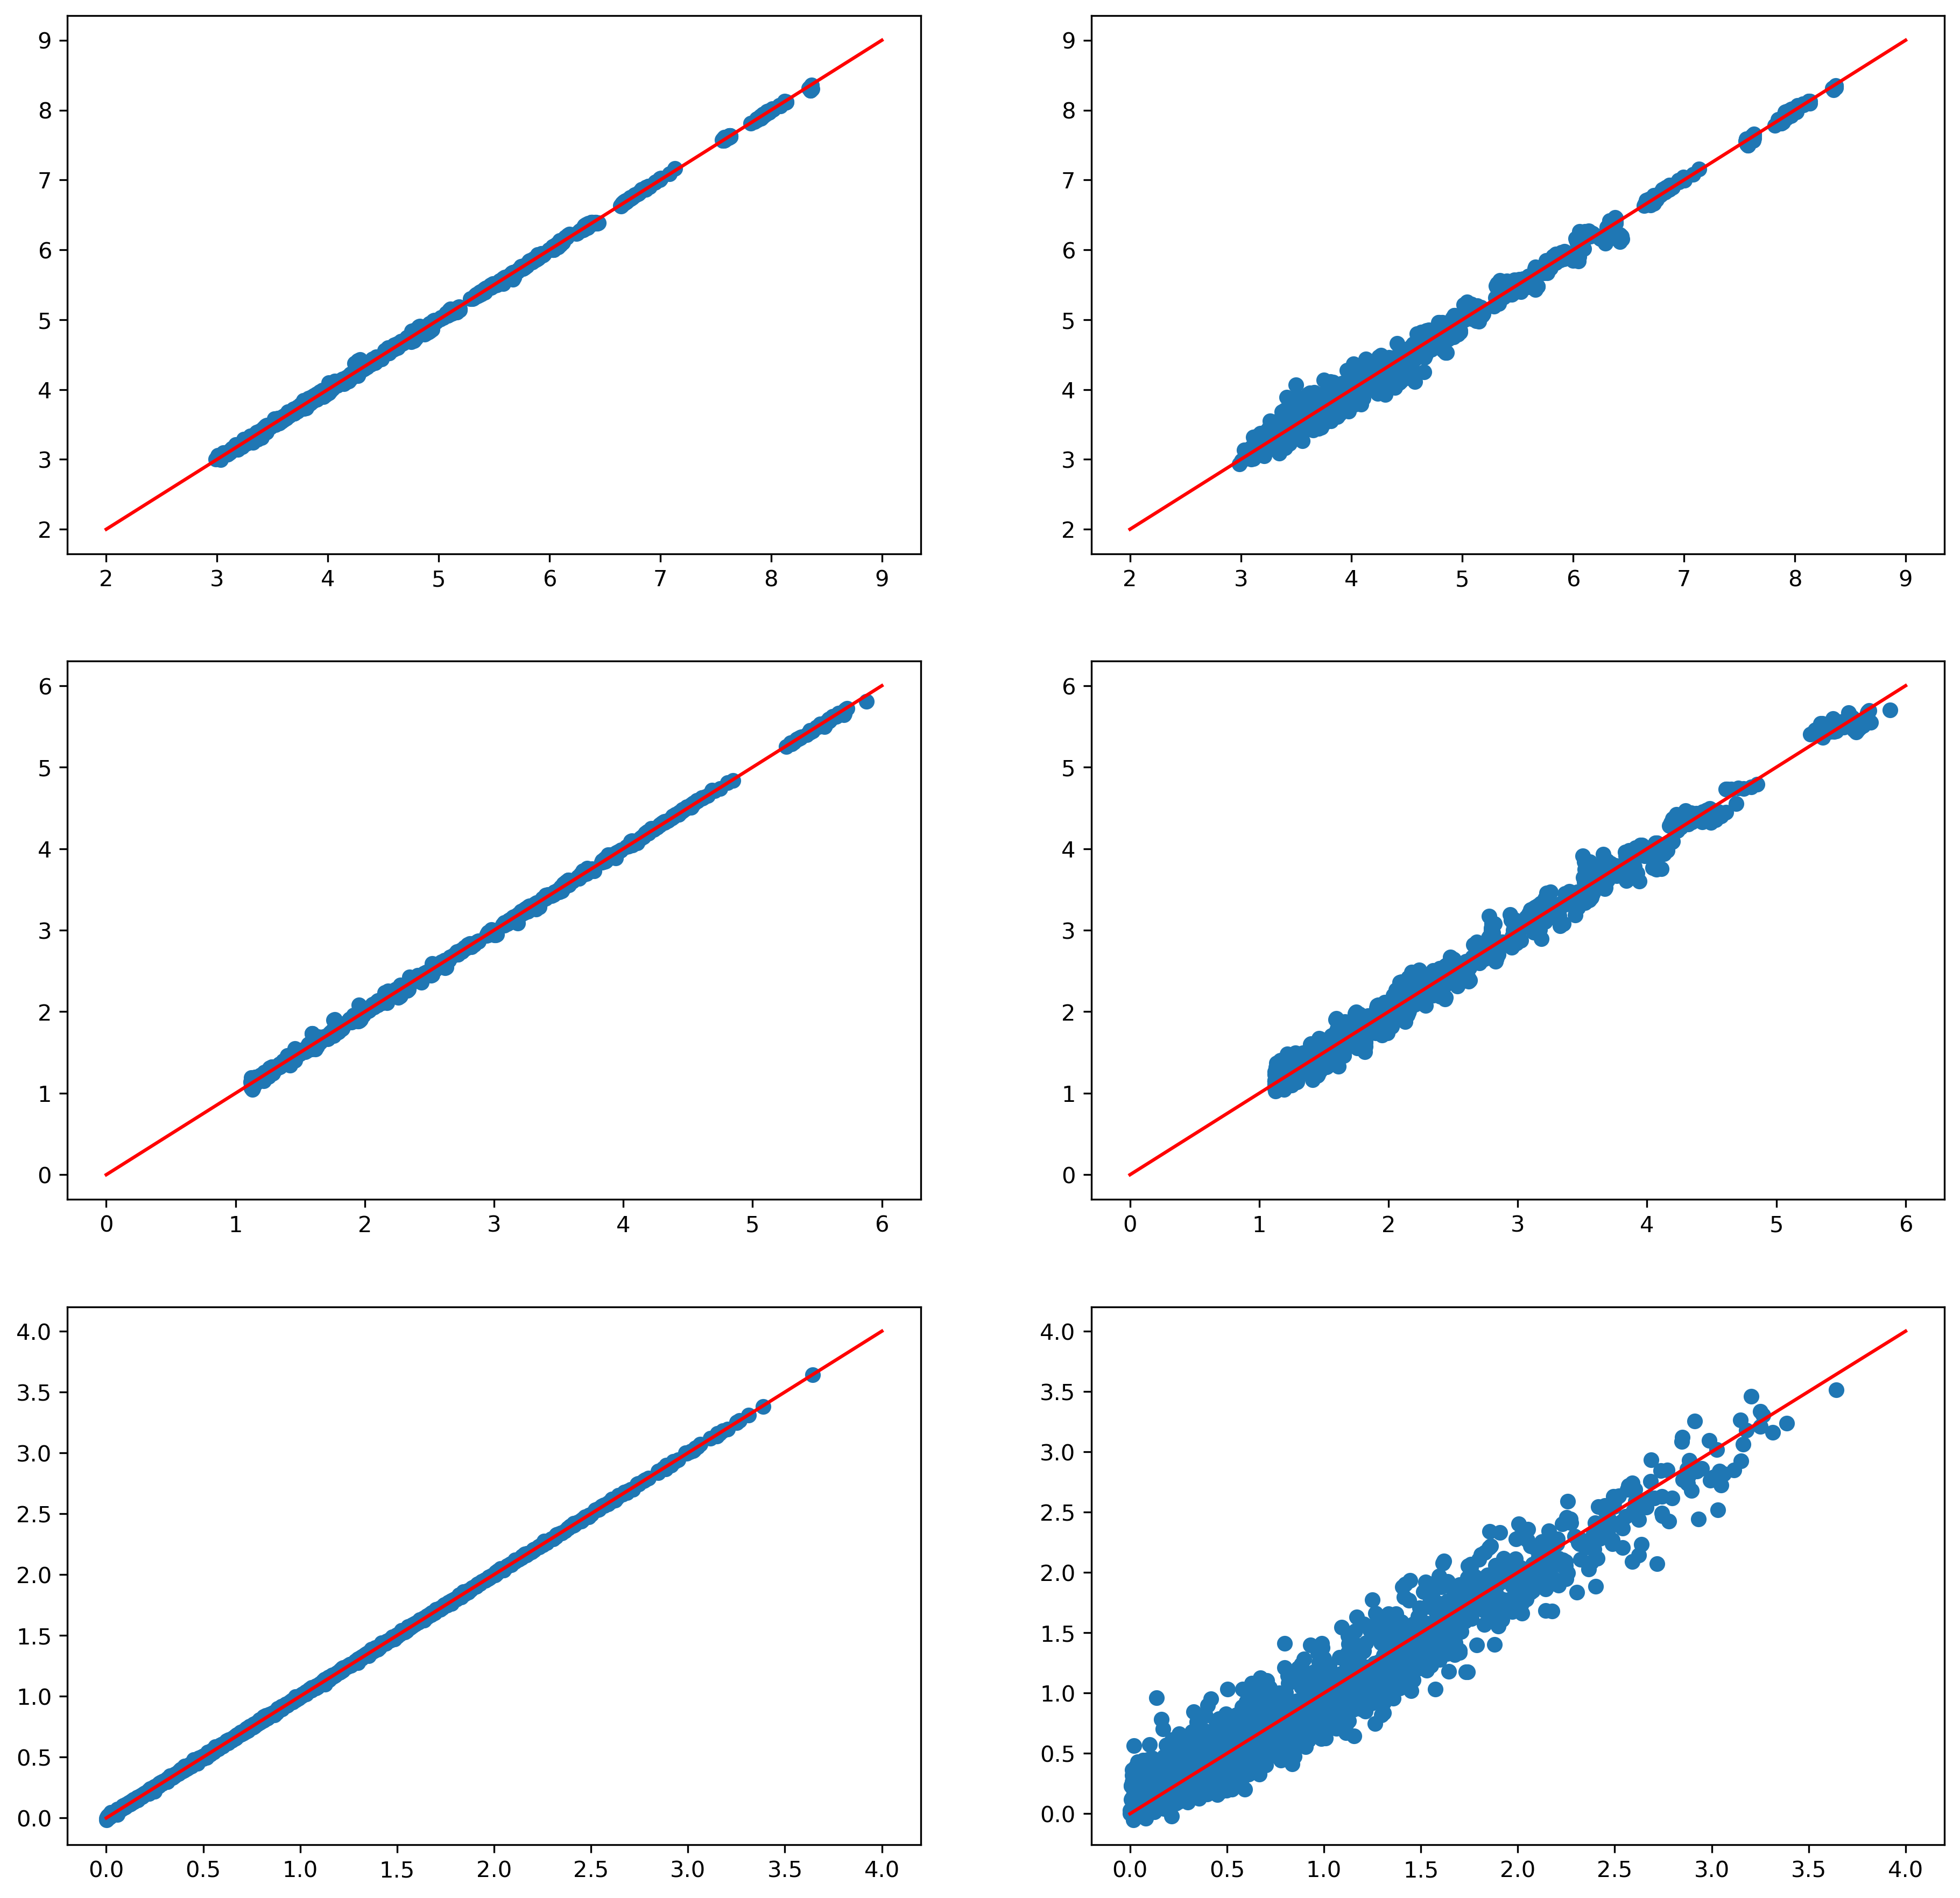

<Figure size 432x288 with 0 Axes>

In [39]:
plot_result(PRmodelA_pred, PRmodelN_pred)

## KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
KNmodelA = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()),
                                        ('KNA', KNeighborsRegressor(n_neighbors=4, weights='distance', n_jobs=-1))]
                                         )
                               ).fit(XA_train, y_train)

KNmodelN = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()),
                                        ('KNN', KNeighborsRegressor(n_neighbors=4, weights='distance', n_jobs=-1))]
                                         )
                               ).fit(XN_train, y_train)

In [42]:
KNmodelA_pred = KNmodelA.predict(XA_test)
KNmodelN_pred = KNmodelN.predict(XN_test)

In [43]:
evaldf_SRD(KNmodelA_pred, KNmodelN_pred, 'KNN')
evaldf_ConSD(KNmodelA_pred, KNmodelN_pred, 'KNN')
evaldf_SCD(KNmodelA_pred, KNmodelN_pred, 'KNN')

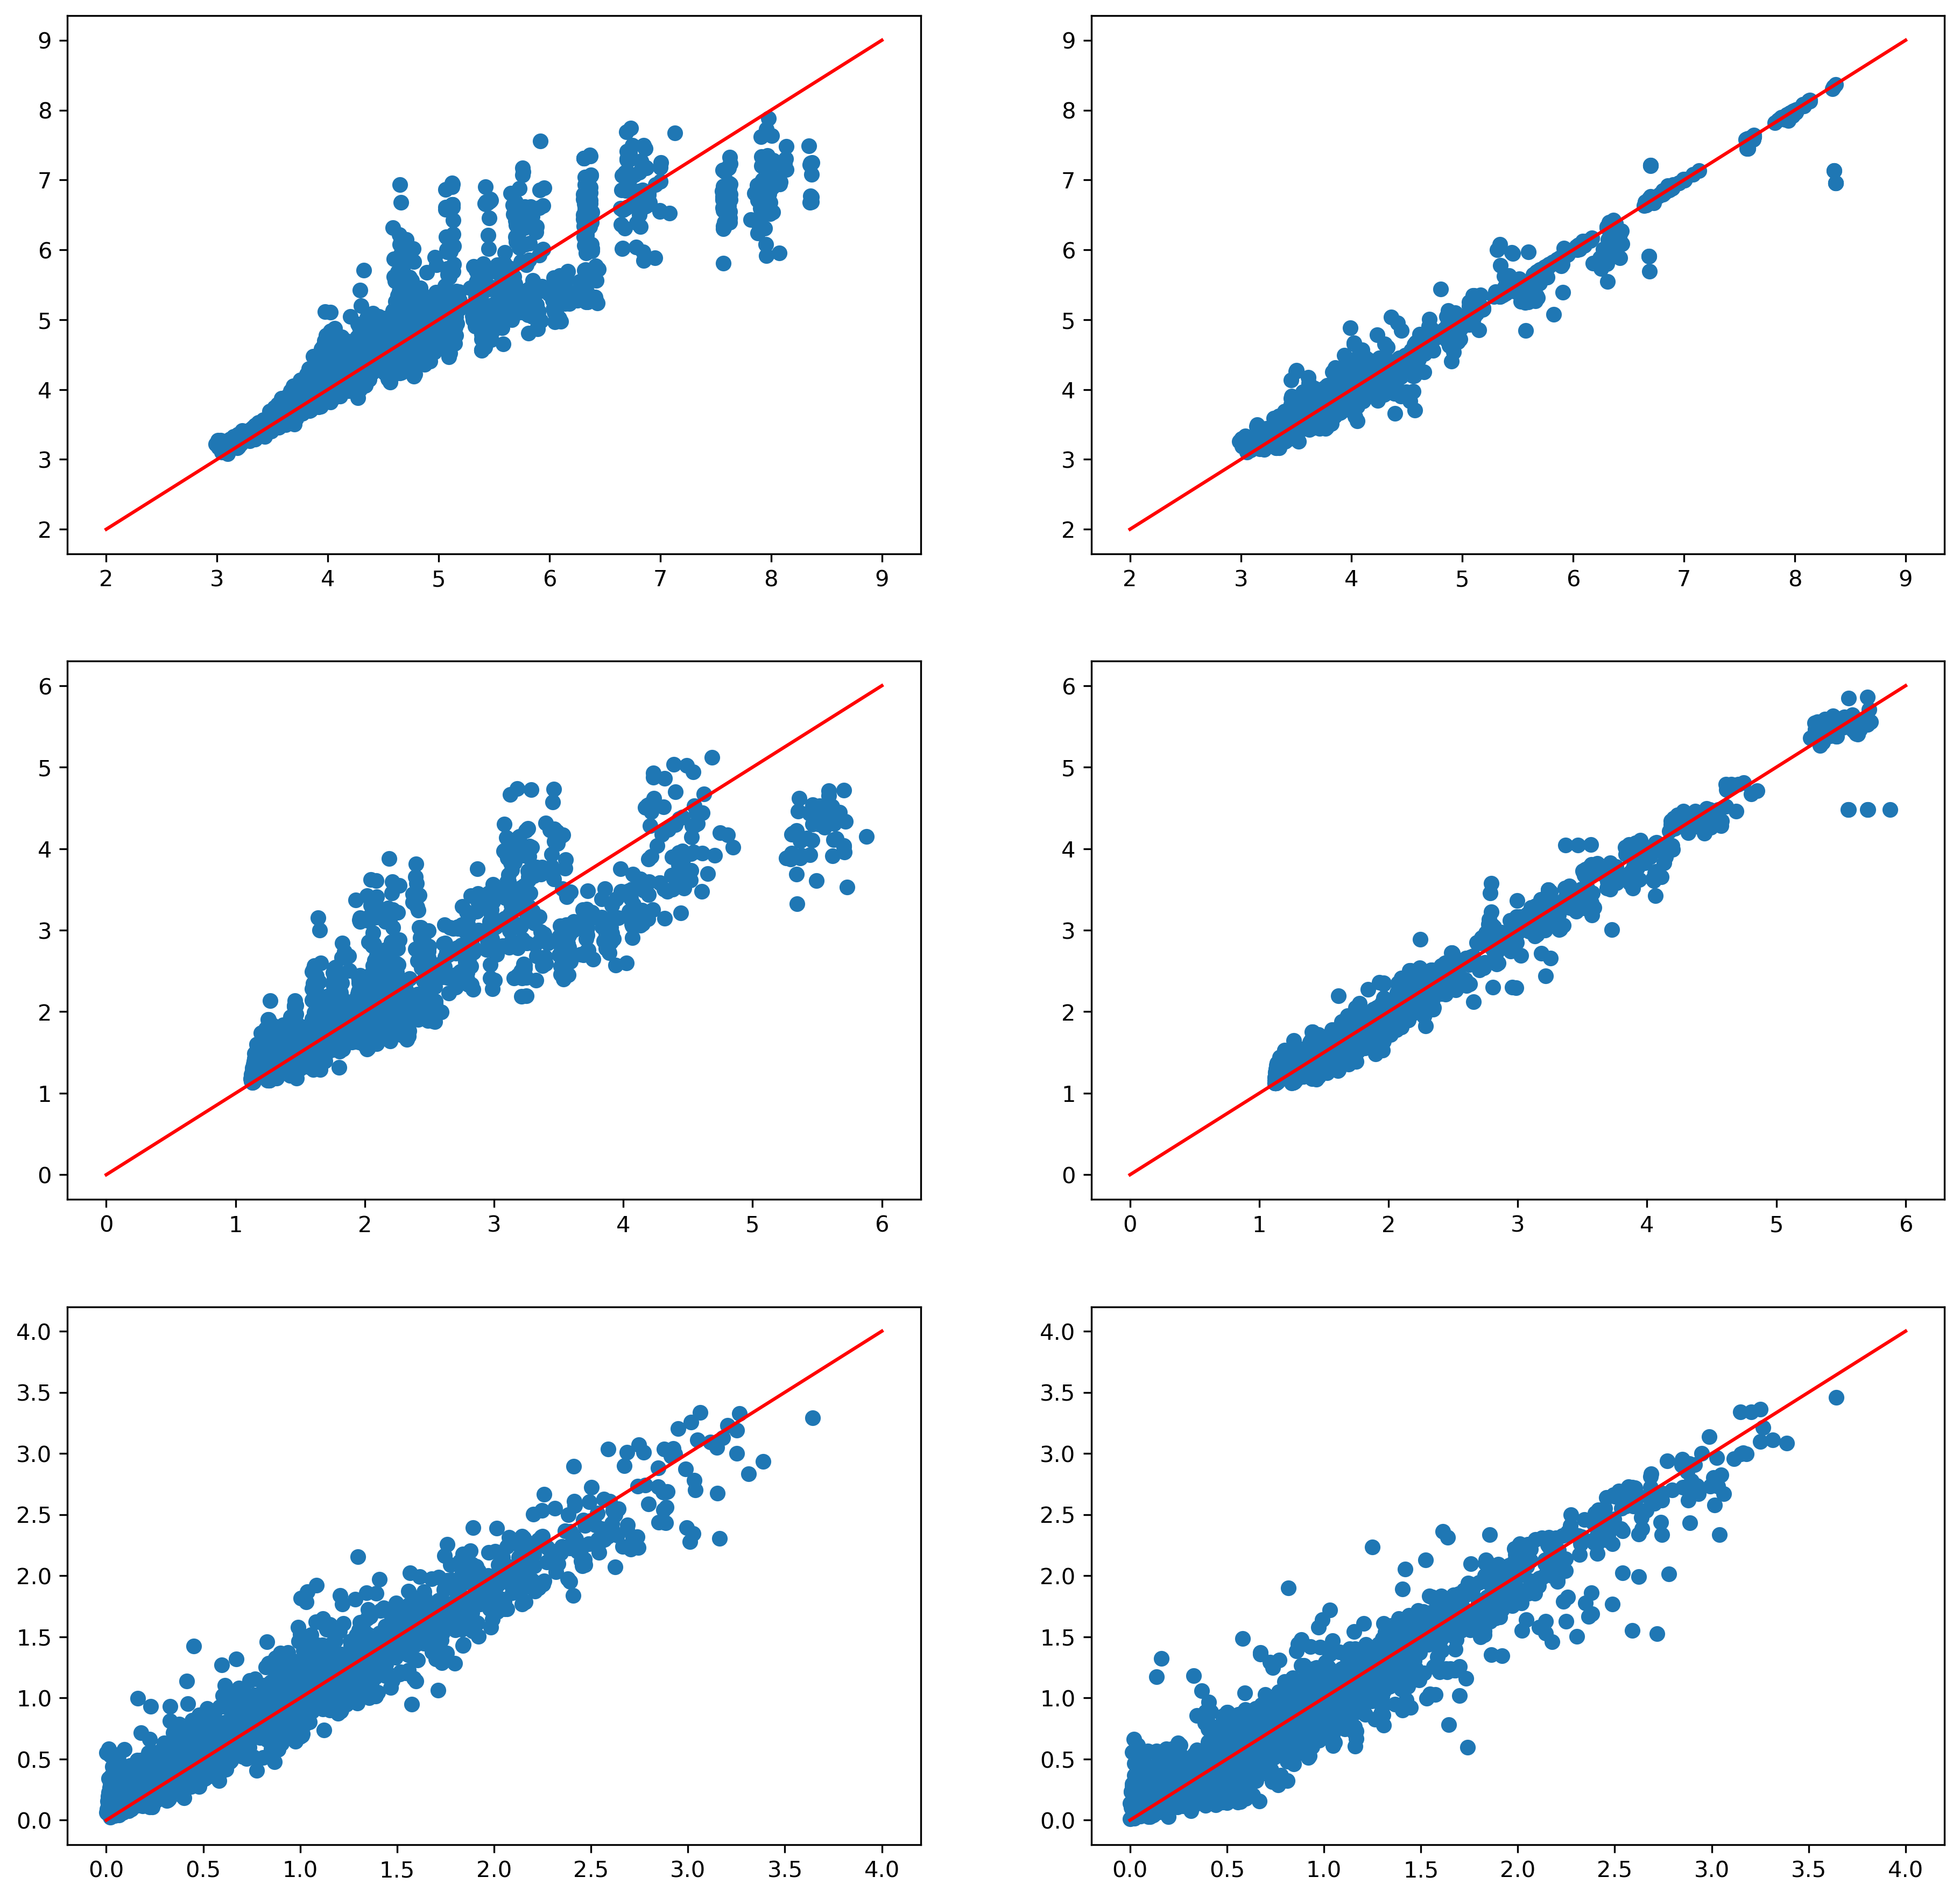

<Figure size 432x288 with 0 Axes>

In [44]:
plot_result(KNmodelA_pred, KNmodelN_pred)

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
DTmodelA = MultiOutputRegressor(DecisionTreeRegressor()).fit(XA_train, y_train)
DTmodelN = MultiOutputRegressor(DecisionTreeRegressor()).fit(XN_train, y_train)

In [47]:
DTmodelA_pred = DTmodelA.predict(XA_test)
DTmodelN_pred = DTmodelN.predict(XN_test)

In [48]:
evaldf_SRD(DTmodelA_pred, DTmodelN_pred, 'DT')
evaldf_ConSD(DTmodelA_pred, DTmodelN_pred, 'DT')
evaldf_SCD(DTmodelA_pred, DTmodelN_pred, 'DT')

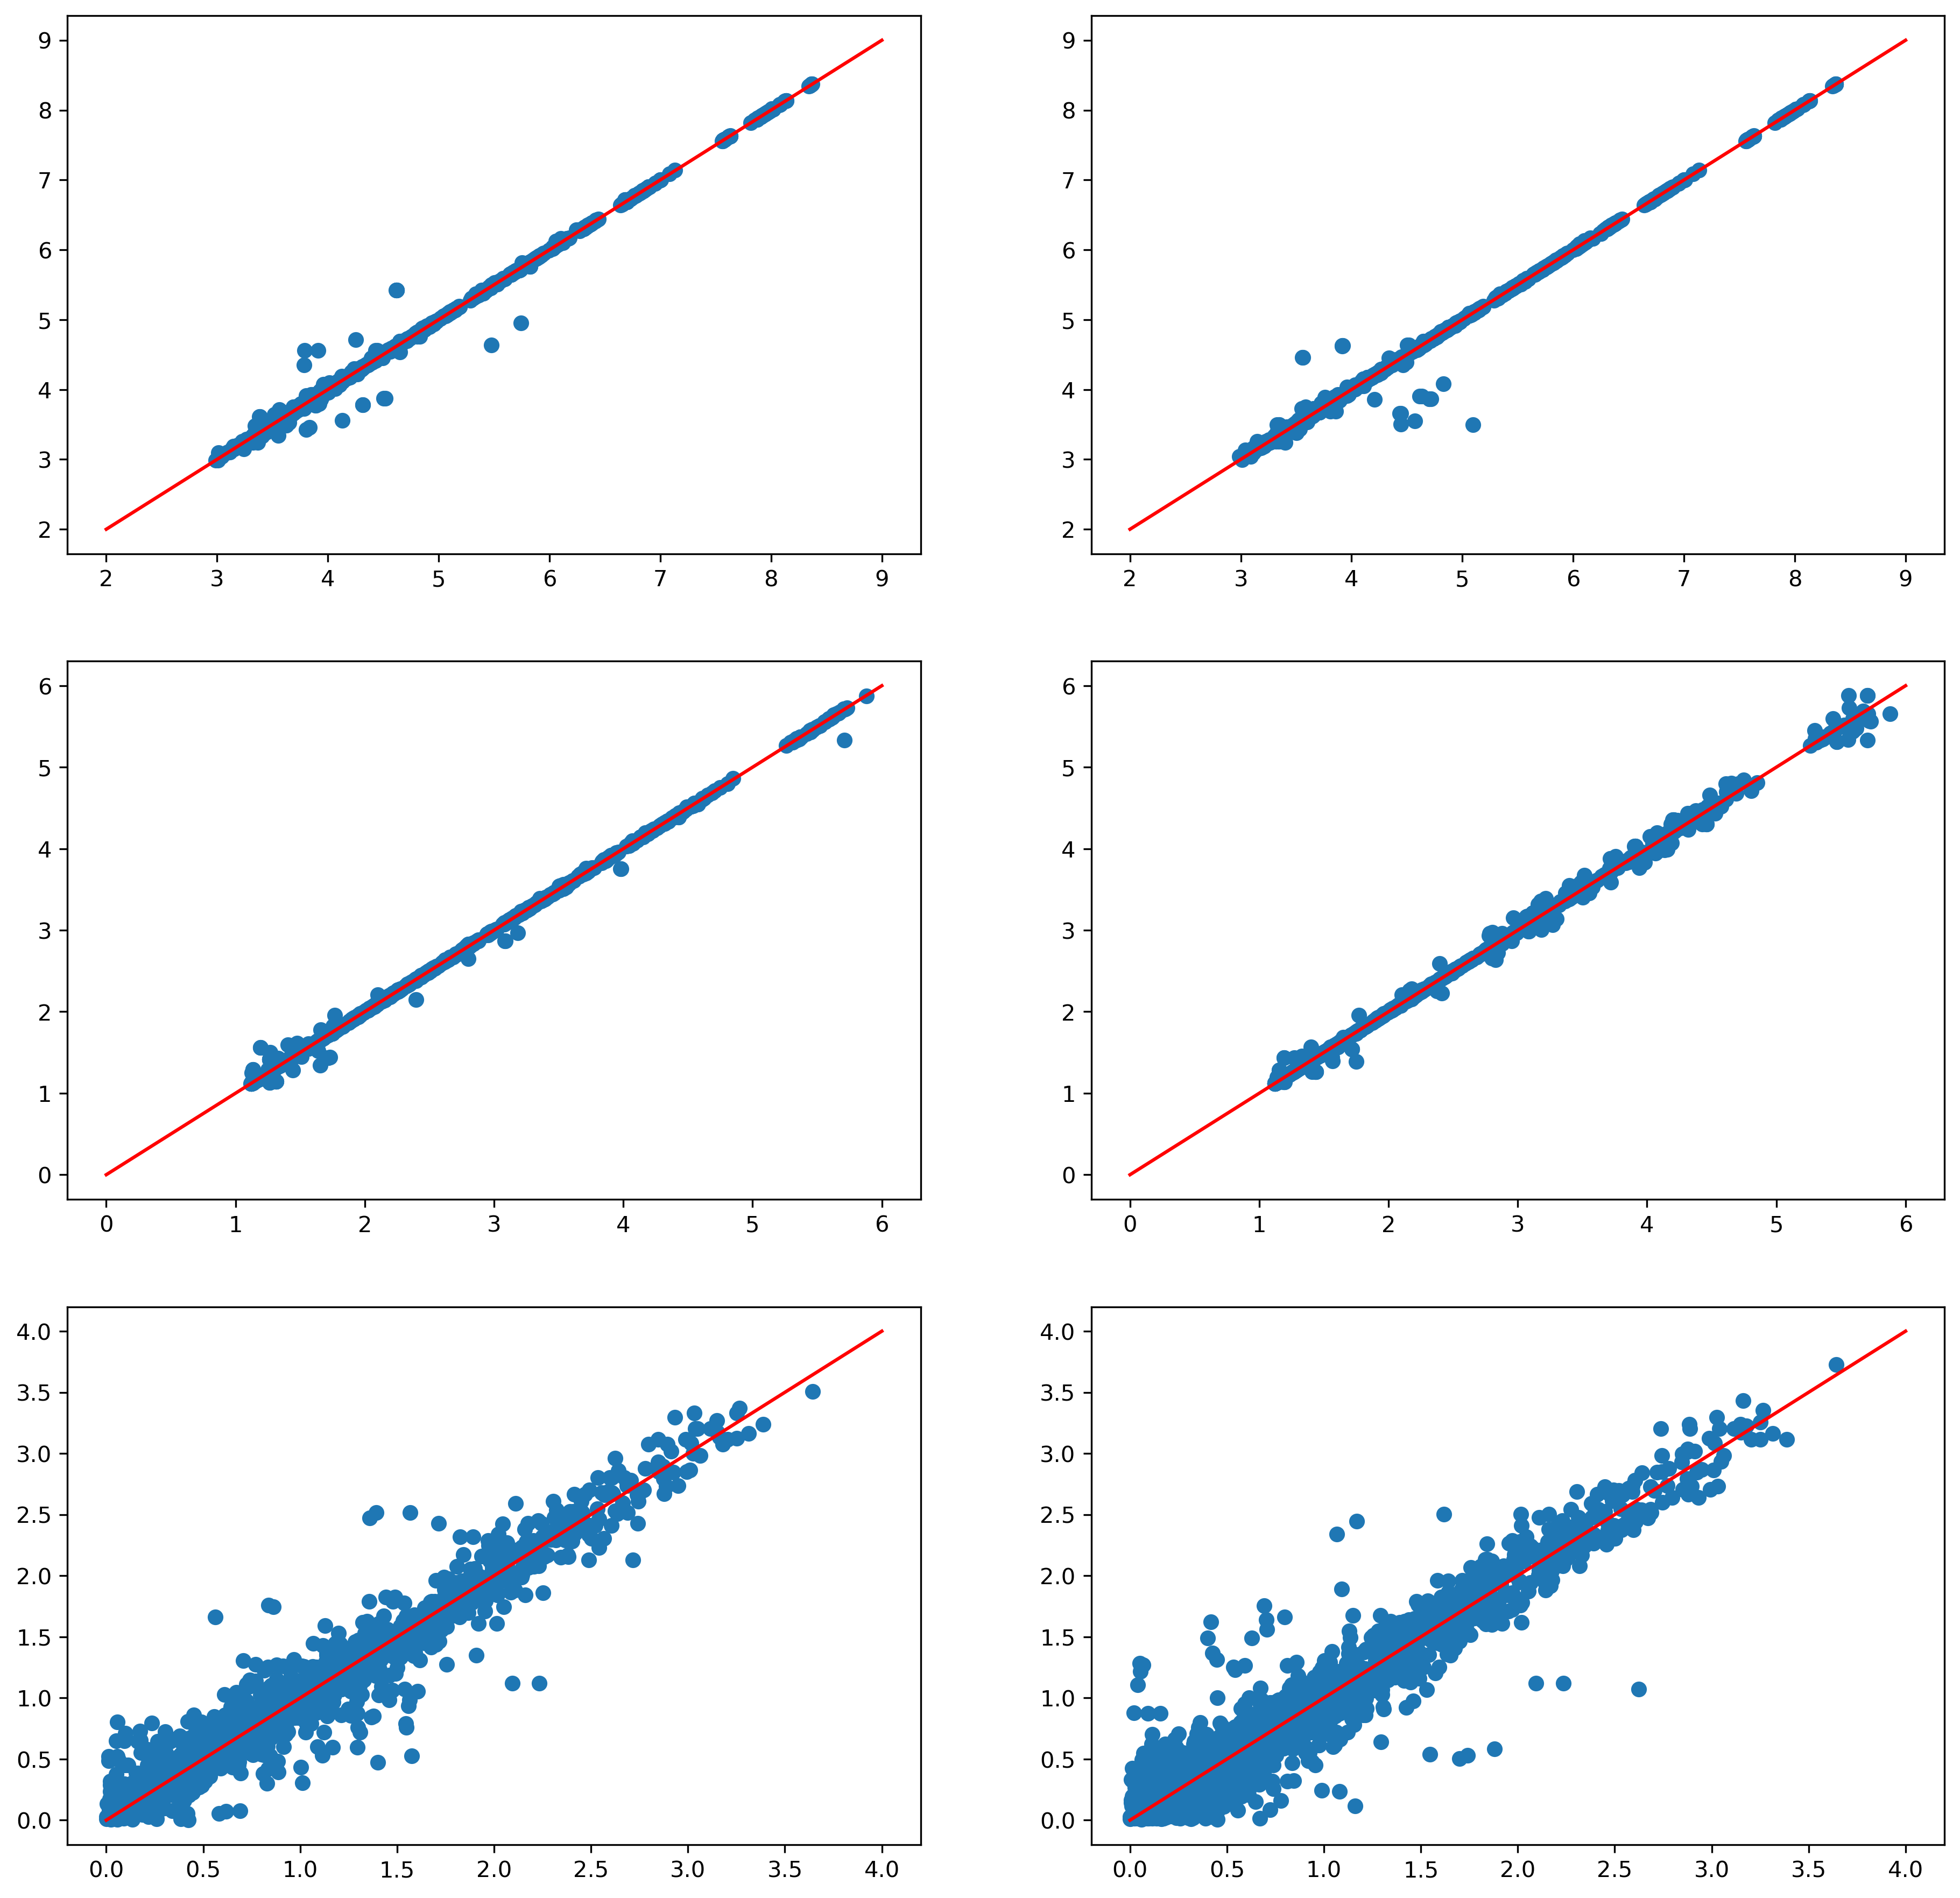

<Figure size 432x288 with 0 Axes>

In [49]:
plot_result(DTmodelA_pred, DTmodelN_pred)

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
RFmodelA = MultiOutputRegressor(RandomForestRegressor(max_depth=20, max_features=6, n_estimators=180, n_jobs=-1)).fit(XA_train, y_train)
RFmodelN = MultiOutputRegressor(RandomForestRegressor(max_depth=20, max_features=6, n_estimators=180, n_jobs=-1)).fit(XN_train, y_train)

In [52]:
RFmodelA_pred = RFmodelA.predict(XA_test)
RFmodelN_pred = RFmodelN.predict(XN_test)

In [53]:
evaldf_SRD(RFmodelA_pred, RFmodelN_pred, 'RF')
evaldf_ConSD(RFmodelA_pred, RFmodelN_pred, 'RF')
evaldf_SCD(RFmodelA_pred, RFmodelN_pred, 'RF')

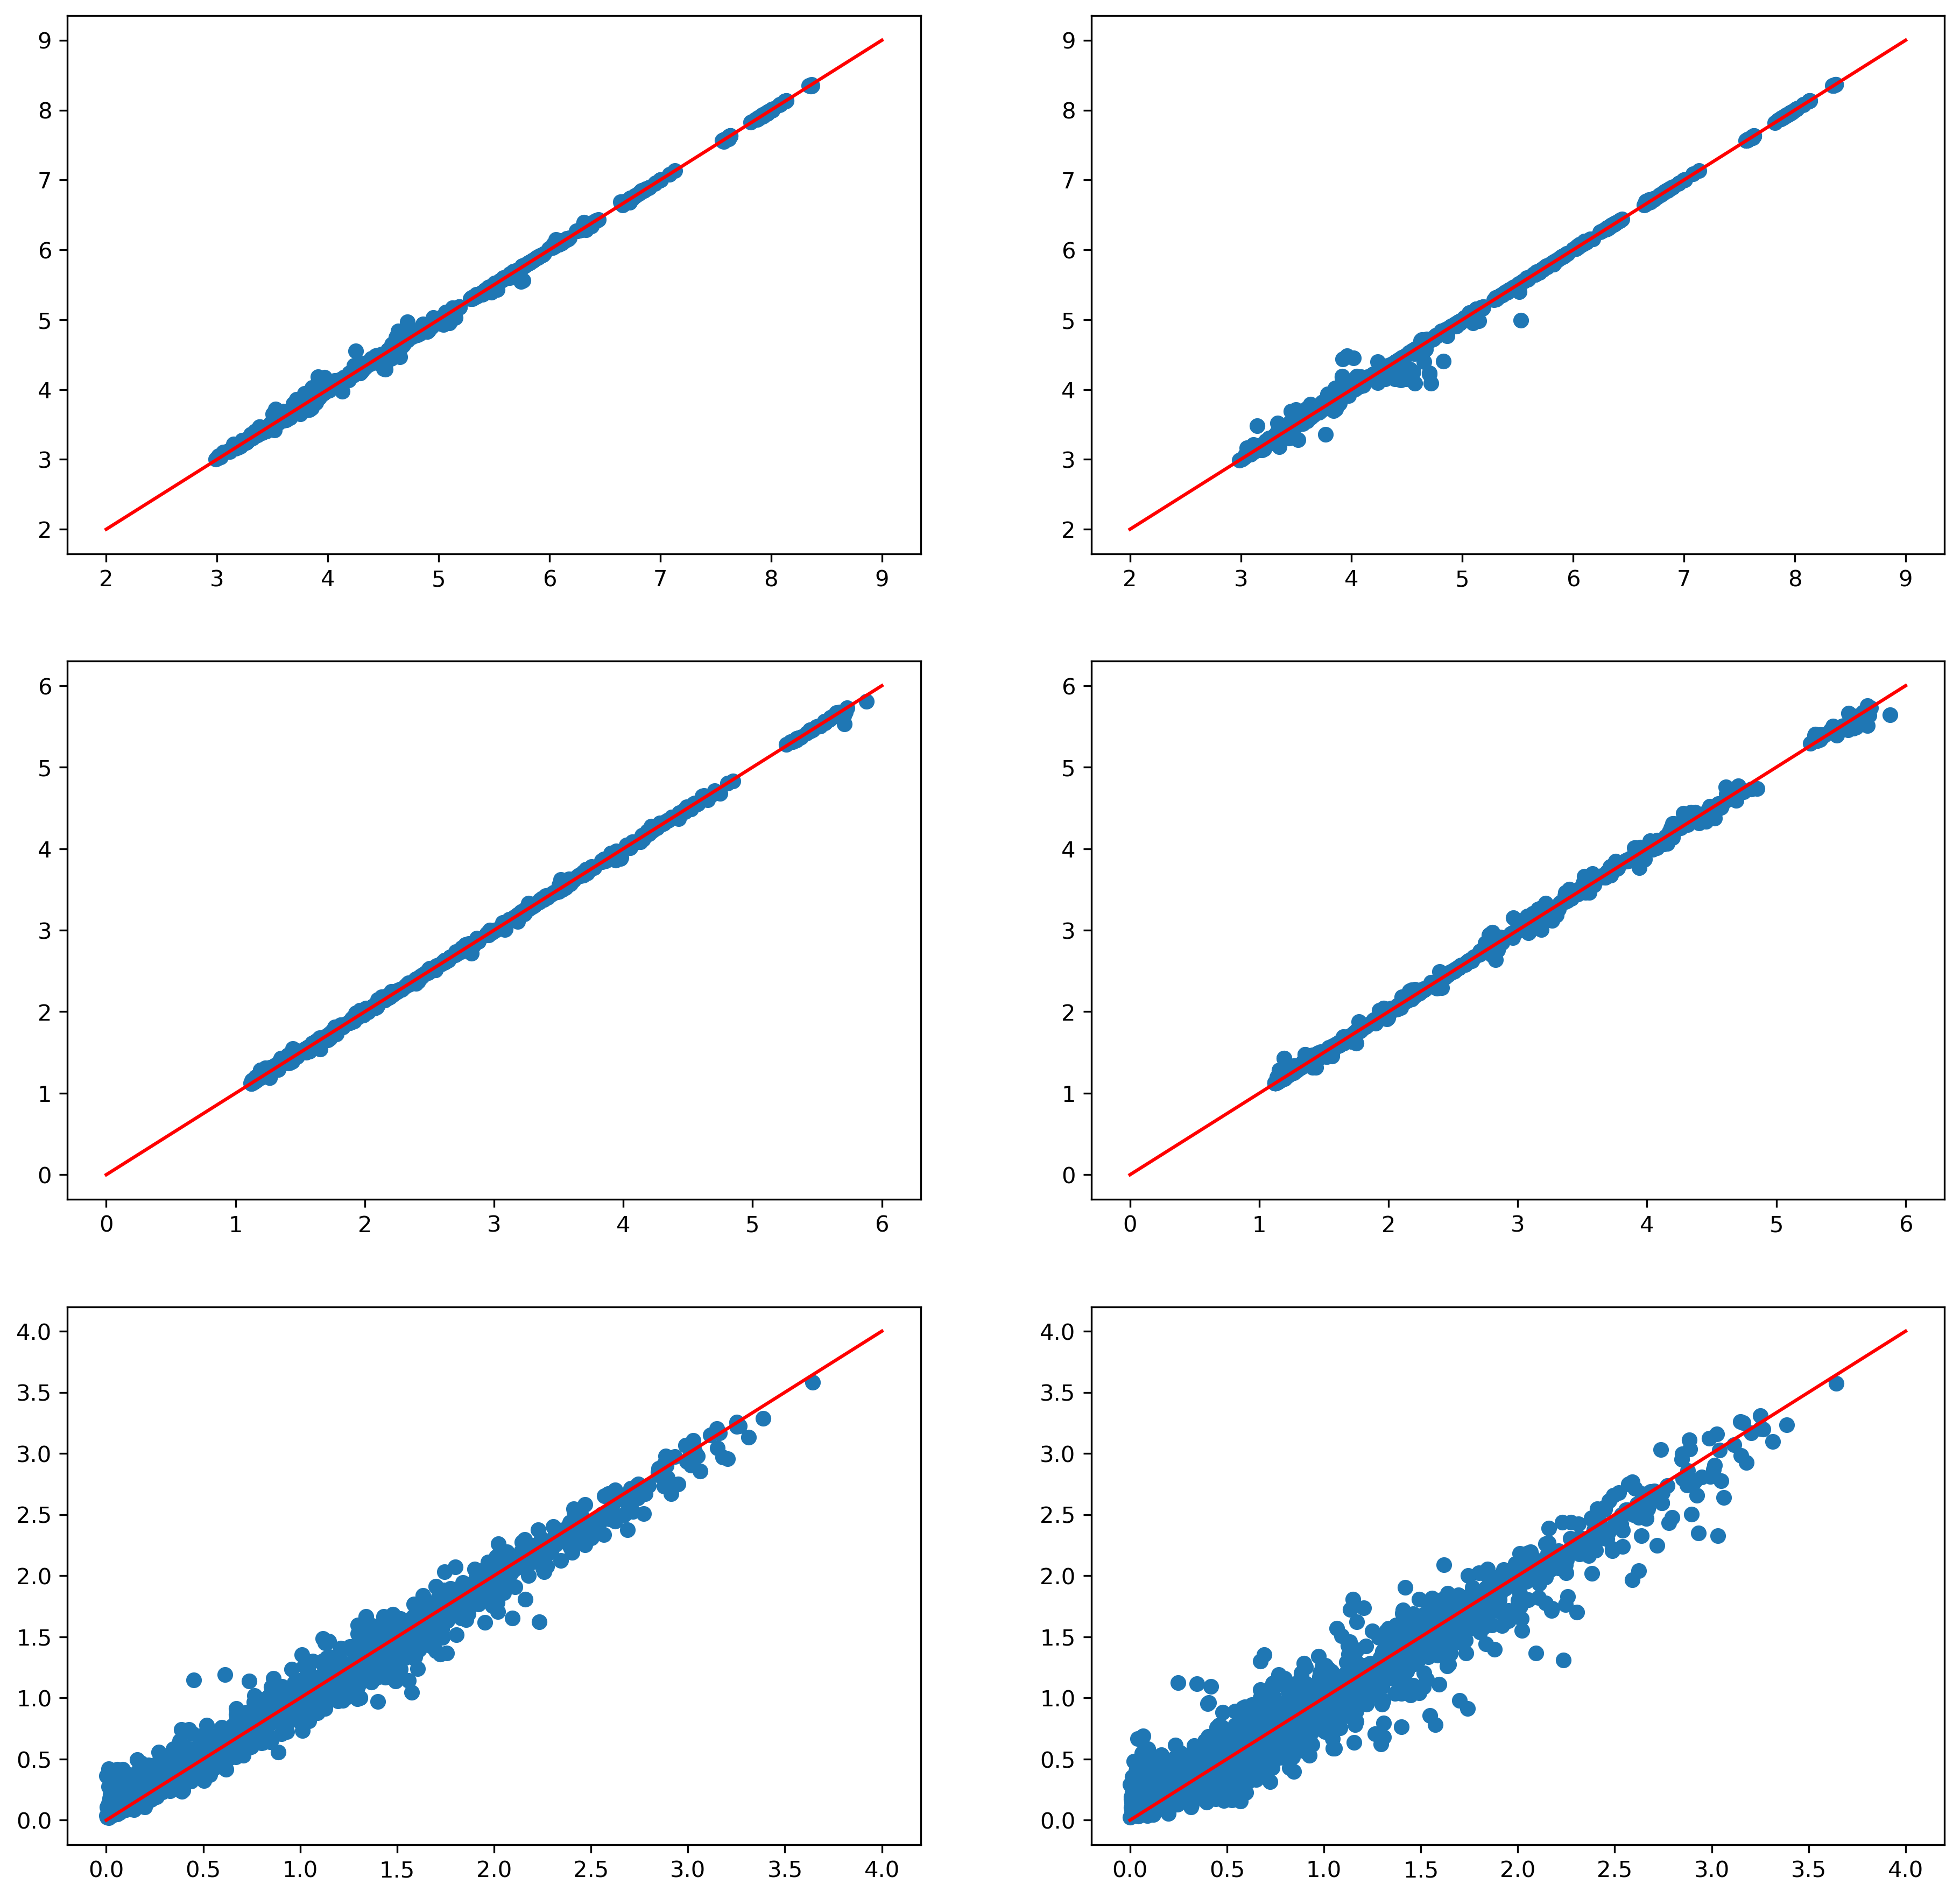

<Figure size 432x288 with 0 Axes>

In [54]:
plot_result(RFmodelA_pred, RFmodelN_pred)

## XGBoost

In [55]:
from xgboost import XGBRegressor

In [56]:
XGmodelA = MultiOutputRegressor(XGBRegressor(max_depth=10, learnin_rate=0.05,subsample=0.8 , n_estimators=250, n_jobs=-1)).fit(XA_train, y_train)
XGmodelN = MultiOutputRegressor(XGBRegressor(max_depth=10, learnin_rate=0.05,subsample=0.8 , n_estimators=250, n_jobs=-1)).fit(XN_train, y_train)

[16:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learnin_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learnin_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learnin_rate" } might not be used.

  Thi

In [57]:
XGmodelA_pred = XGmodelA.predict(XA_test)
XGmodelN_pred = XGmodelN.predict(XN_test)

In [58]:
evaldf_SRD(XGmodelA_pred, XGmodelN_pred, 'XG')
evaldf_ConSD(XGmodelA_pred, XGmodelN_pred, 'XG')
evaldf_SCD(XGmodelA_pred, XGmodelN_pred, 'XG')

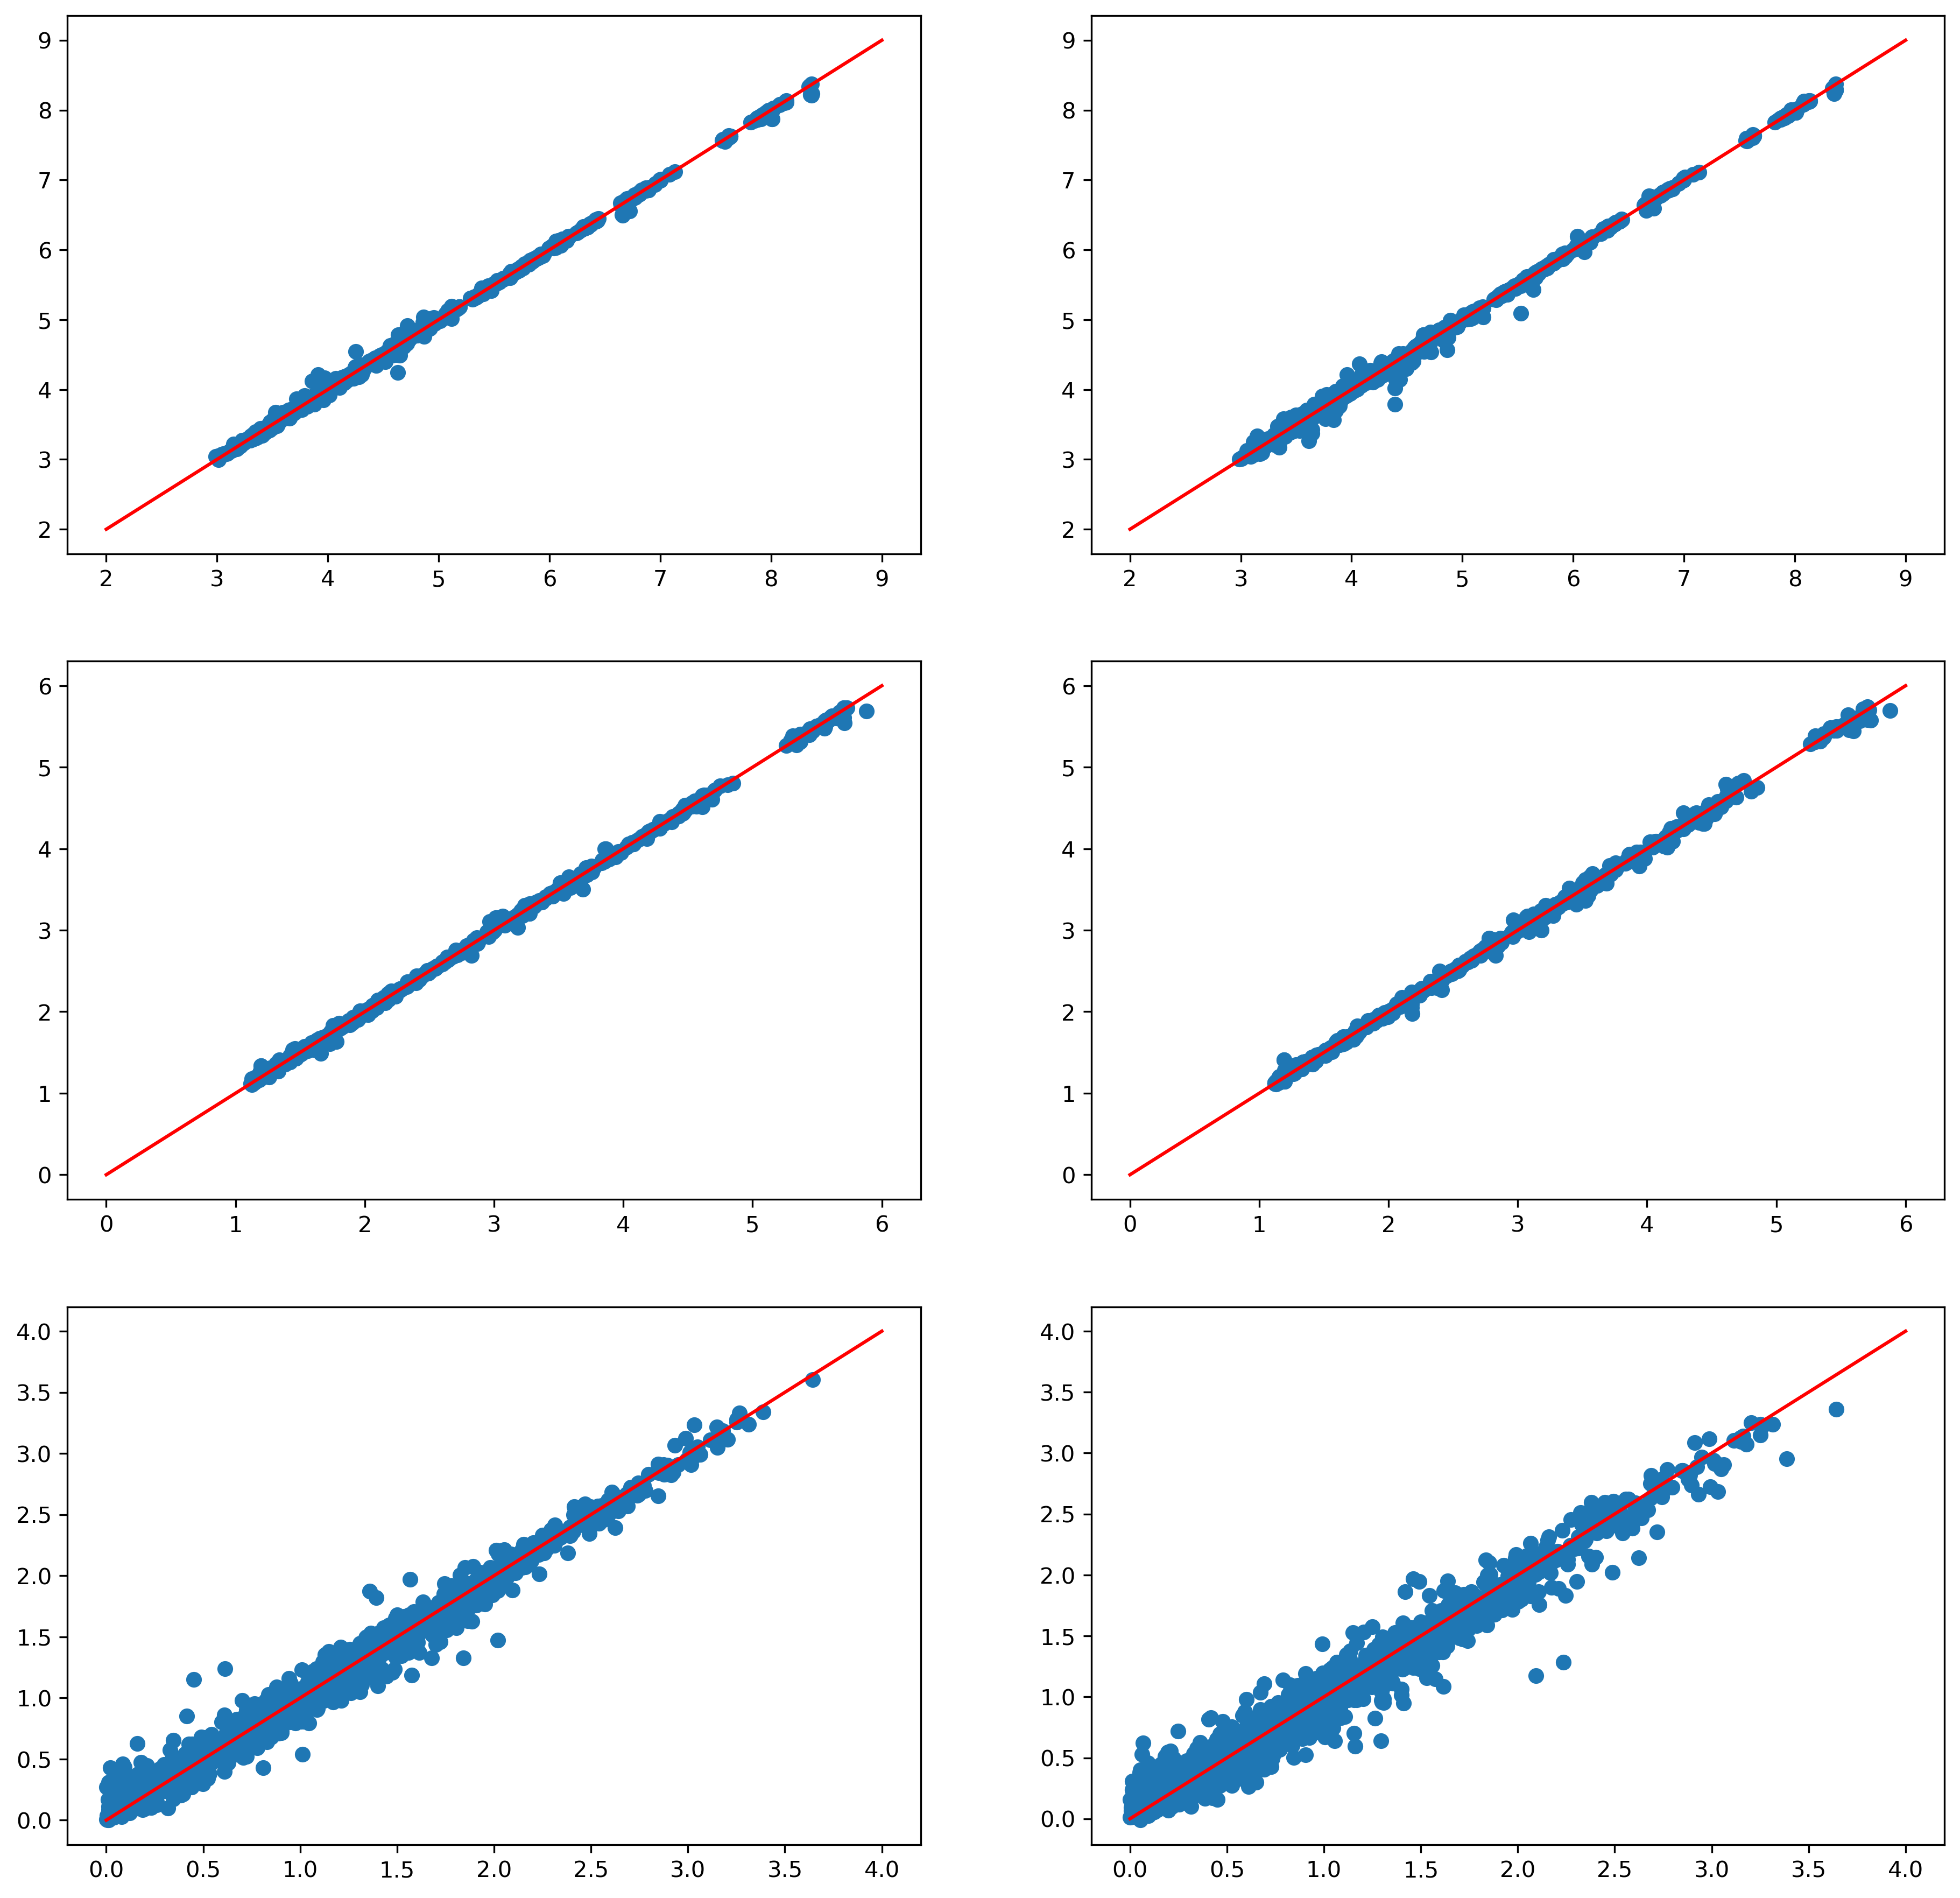

<Figure size 432x288 with 0 Axes>

In [59]:
plot_result(XGmodelA_pred, XGmodelN_pred)

## DNN

In [60]:
import tensorflow as tf

In [61]:
scalerA = StandardScaler()
scalerA.fit(XA_train)
XA_train_s = scalerA.transform(XA_train)
XA_test_s = scalerA.transform(XA_test)

In [62]:
scalerN = StandardScaler()
scalerN.fit(XN_train)
XN_train_s = scalerN.transform(XN_train)
XN_test_s = scalerN.transform(XN_test)

In [63]:
DNmodelA = tf.keras.Sequential()

DNmodelA.add(tf.keras.layers.Dense(22, input_dim=XA_train_s.shape[1], activation='tanh'))
DNmodelA.add(tf.keras.layers.Dense(26, activation='tanh'))
DNmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelA.add(tf.keras.layers.Dense(3))

DNmodelA.compile(loss="mean_squared_error", optimizer="adam")

DNmodelA.fit(XA_train_s, y_train, epochs= 150)

Epoch 1/150
125/125 [==============================] - 0s 863us/step - loss: 3.4730
Epoch 2/150
125/125 [==============================] - 0s 771us/step - loss: 0.4572
Epoch 3/150
125/125 [==============================] - 0s 845us/step - loss: 0.3222
Epoch 4/150
125/125 [==============================] - 0s 767us/step - loss: 0.2148
Epoch 5/150
125/125 [==============================] - 0s 780us/step - loss: 0.1344
Epoch 6/150
125/125 [==============================] - 0s 738us/step - loss: 0.0809
Epoch 7/150
125/125 [==============================] - 0s 747us/step - loss: 0.0530
Epoch 8/150
125/125 [==============================] - 0s 740us/step - loss: 0.0394
Epoch 9/150
125/125 [==============================] - 0s 739us/step - loss: 0.0299
Epoch 10/150
125/125 [==============================] - 0s 743us/step - loss: 0.0239
Epoch 11/150
125/125 [==============================] - 0s 732us/step - loss: 0.0201
Epoch 12/150
125/125 [==============================] - 0s 759us/step - lo

125/125 [==============================] - 0s 740us/step - loss: 0.0022
Epoch 98/150
125/125 [==============================] - 0s 715us/step - loss: 0.0024
Epoch 99/150
125/125 [==============================] - 0s 747us/step - loss: 0.0022
Epoch 100/150
125/125 [==============================] - 0s 725us/step - loss: 0.0026
Epoch 101/150
125/125 [==============================] - 0s 735us/step - loss: 0.0025
Epoch 102/150
125/125 [==============================] - 0s 737us/step - loss: 0.0021
Epoch 103/150
125/125 [==============================] - 0s 735us/step - loss: 0.0021
Epoch 104/150
125/125 [==============================] - 0s 731us/step - loss: 0.0022
Epoch 105/150
125/125 [==============================] - 0s 748us/step - loss: 0.0023
Epoch 106/150
125/125 [==============================] - 0s 740us/step - loss: 0.0025
Epoch 107/150
125/125 [==============================] - 0s 740us/step - loss: 0.0025
Epoch 108/150
125/125 [==============================] - 0s 727us/step

In [64]:
DNmodelN = tf.keras.Sequential()

DNmodelN.add(tf.keras.layers.Dense(22, input_dim=XN_train_s.shape[1], activation='tanh'))
DNmodelN.add(tf.keras.layers.Dense(26, activation='tanh'))
DNmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelN.add(tf.keras.layers.Dense(3))

DNmodelN.compile(loss="mean_squared_error", optimizer="adam")

DNmodelN.fit(XN_train_s, y_train, epochs= 150)

Epoch 1/150
125/125 [==============================] - 0s 871us/step - loss: 3.4460
Epoch 2/150
125/125 [==============================] - 0s 758us/step - loss: 0.4269
Epoch 3/150
125/125 [==============================] - 0s 756us/step - loss: 0.2833
Epoch 4/150
125/125 [==============================] - 0s 791us/step - loss: 0.1658
Epoch 5/150
125/125 [==============================] - 0s 757us/step - loss: 0.1029
Epoch 6/150
125/125 [==============================] - 0s 777us/step - loss: 0.0759
Epoch 7/150
125/125 [==============================] - 0s 756us/step - loss: 0.0609
Epoch 8/150
125/125 [==============================] - 0s 785us/step - loss: 0.0543
Epoch 9/150
125/125 [==============================] - 0s 786us/step - loss: 0.0516
Epoch 10/150
125/125 [==============================] - 0s 775us/step - loss: 0.0479
Epoch 11/150
125/125 [==============================] - 0s 767us/step - loss: 0.0451
Epoch 12/150
125/125 [==============================] - 0s 775us/step - lo

125/125 [==============================] - 0s 745us/step - loss: 0.0250
Epoch 98/150
125/125 [==============================] - 0s 735us/step - loss: 0.0251
Epoch 99/150
125/125 [==============================] - 0s 756us/step - loss: 0.0246
Epoch 100/150
125/125 [==============================] - 0s 772us/step - loss: 0.0247
Epoch 101/150
125/125 [==============================] - 0s 759us/step - loss: 0.0247
Epoch 102/150
125/125 [==============================] - 0s 746us/step - loss: 0.0247
Epoch 103/150
125/125 [==============================] - 0s 759us/step - loss: 0.0251
Epoch 104/150
125/125 [==============================] - 0s 760us/step - loss: 0.0249
Epoch 105/150
125/125 [==============================] - 0s 747us/step - loss: 0.0249
Epoch 106/150
125/125 [==============================] - 0s 750us/step - loss: 0.0256
Epoch 107/150
125/125 [==============================] - 0s 756us/step - loss: 0.0242
Epoch 108/150
125/125 [==============================] - 0s 759us/step

In [65]:
DNmodelA_pred = DNmodelA.predict(XA_test_s)
DNmodelN_pred = DNmodelN.predict(XN_test_s)

54/54 [==============================] - 0s 797us/step


In [66]:
evaldf_SRD(DNmodelA_pred, DNmodelN_pred, 'DN')
evaldf_ConSD(DNmodelA_pred, DNmodelN_pred, 'DN')
evaldf_SCD(DNmodelA_pred, DNmodelN_pred, 'DN')

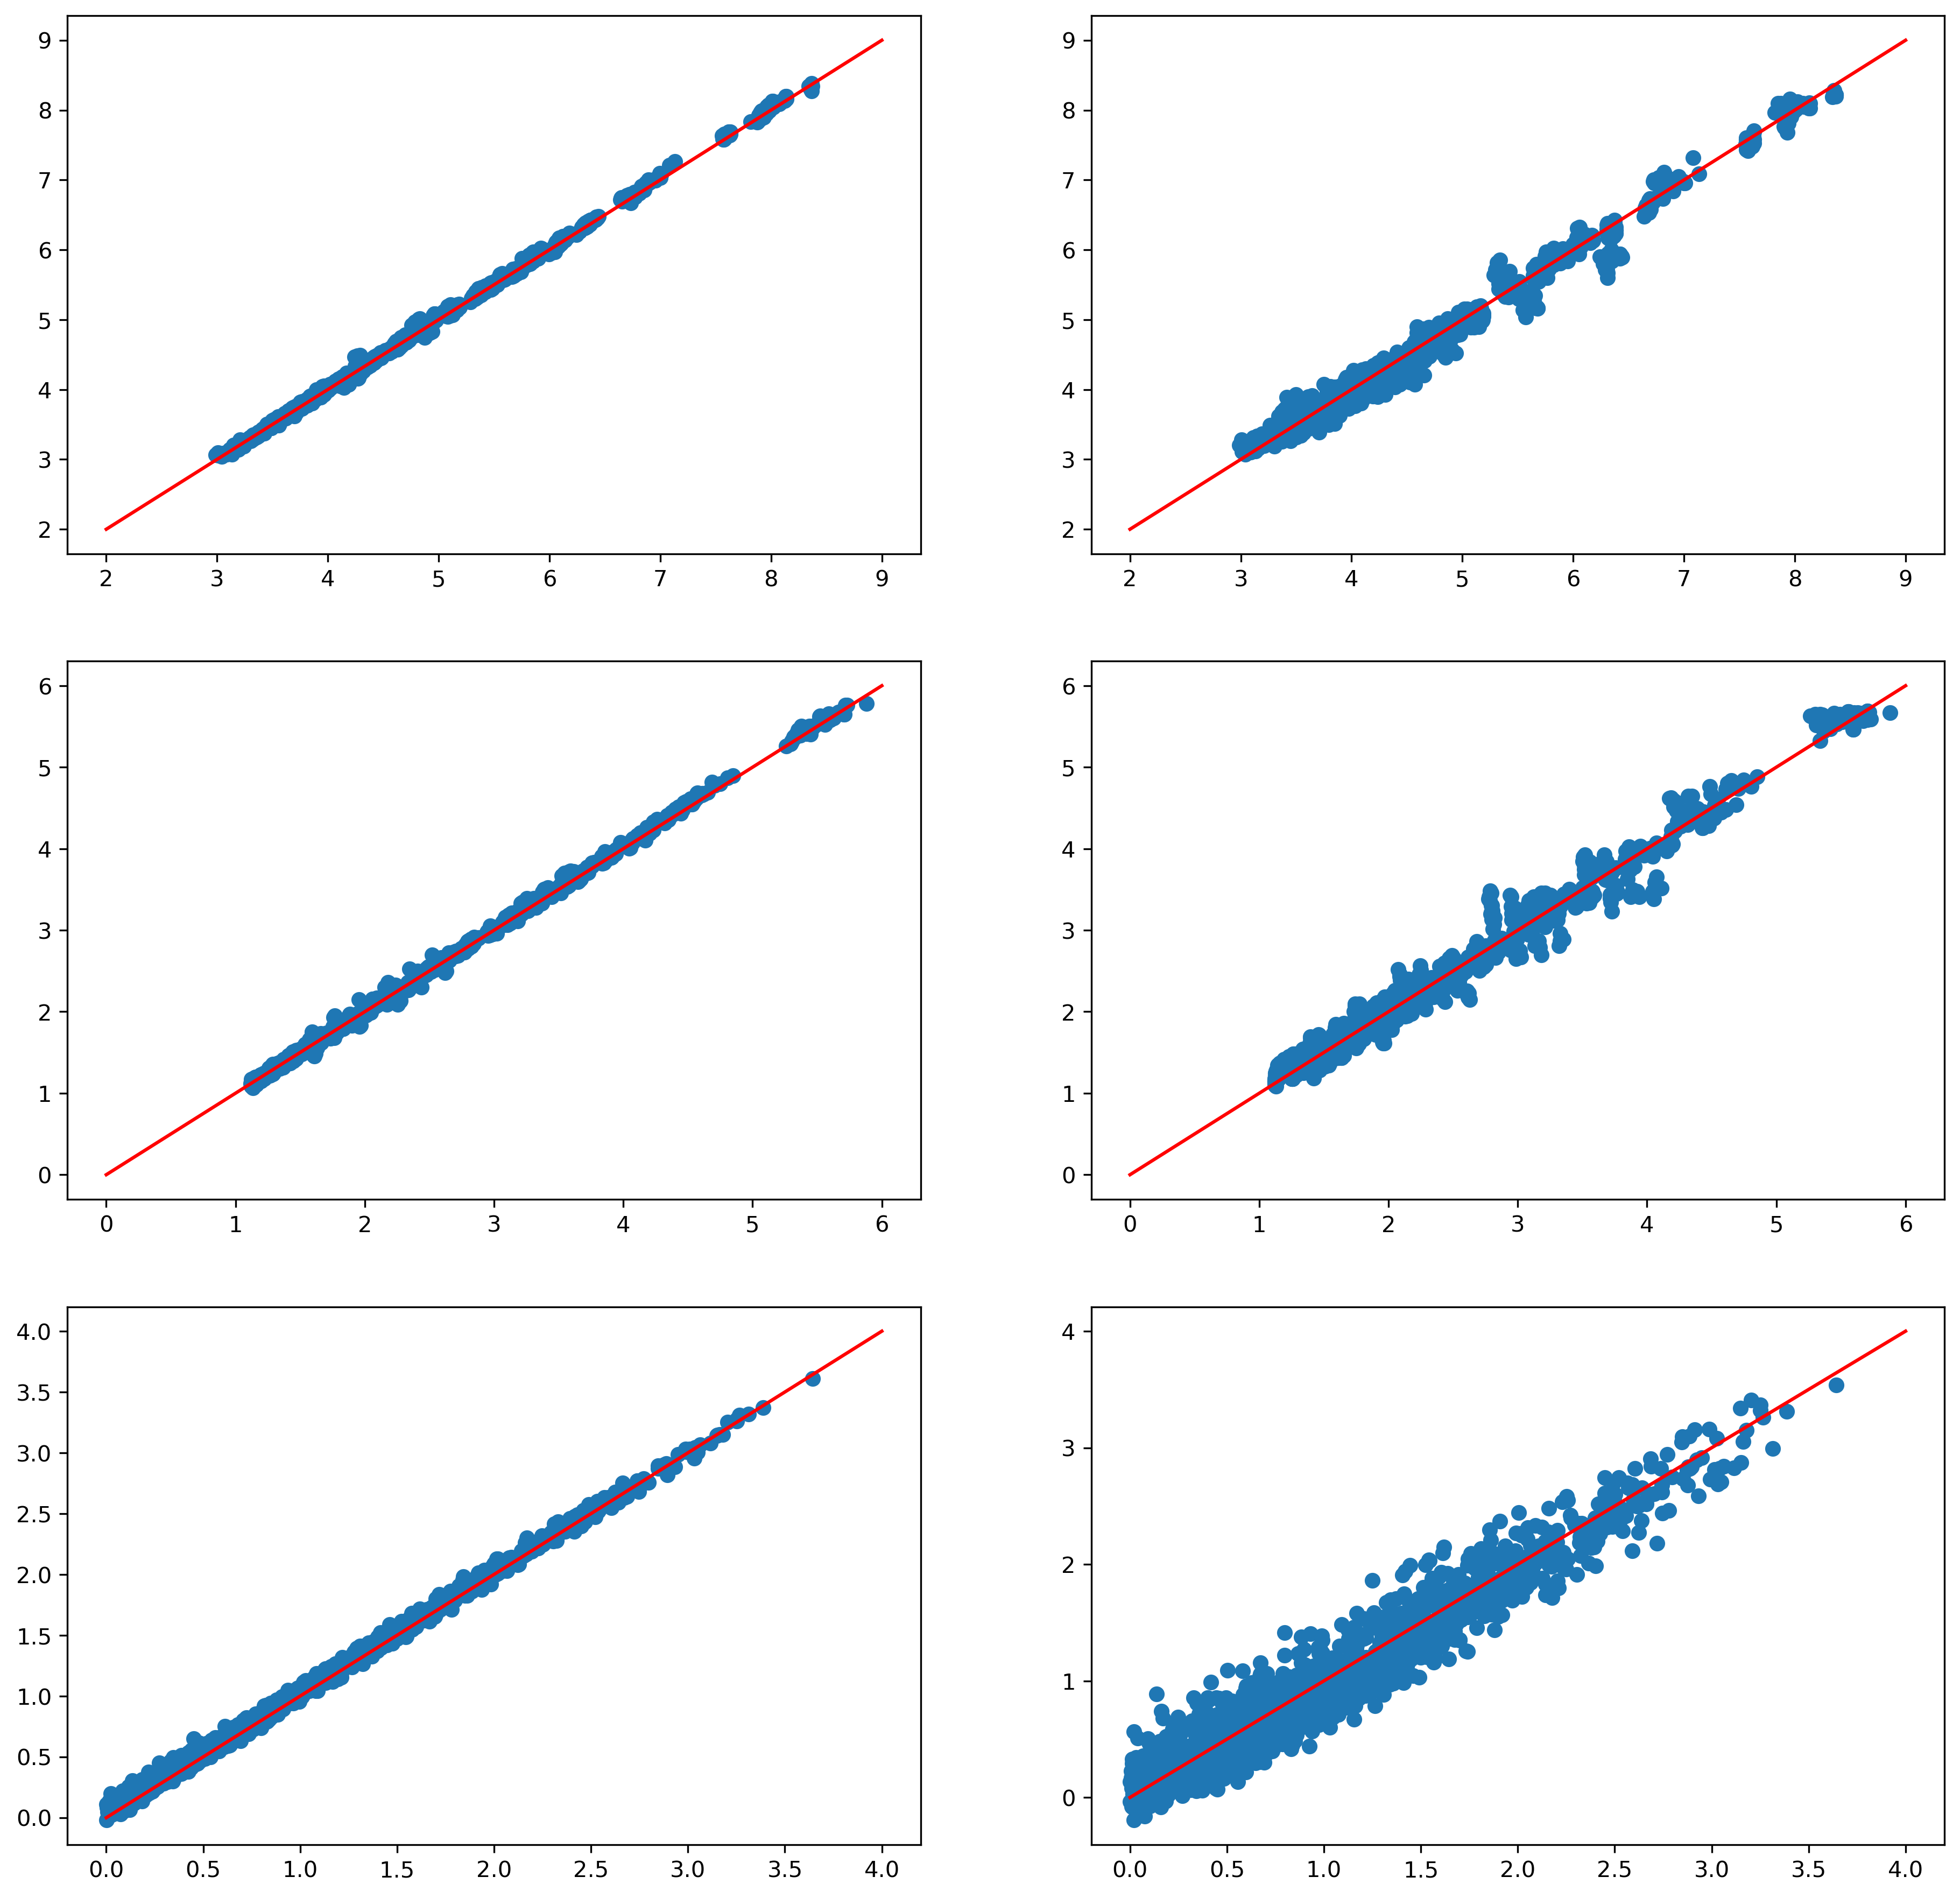

<Figure size 432x288 with 0 Axes>

In [67]:
plot_result(DNmodelA_pred, DNmodelN_pred)

## SVM

In [68]:
from sklearn.svm import SVR

In [69]:
SVmodelA = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()), ('svrA', SVR(C=100, degree=2, gamma= 'auto', kernel ='rbf'))])).fit(XA_train, y_train)
SVmodelN = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()), ('svrN', SVR(C=100, degree=2, gamma= 'auto', kernel ='rbf'))])).fit(XN_train, y_train)

In [70]:
SVmodelA_pred = SVmodelA.predict(XA_test)
SVmodelN_pred = SVmodelN.predict(XN_test)

In [71]:
evaldf_SRD(SVmodelA_pred, SVmodelN_pred, 'SV')
evaldf_ConSD(SVmodelA_pred, SVmodelN_pred, 'SV')
evaldf_SCD(SVmodelA_pred, SVmodelN_pred, 'SV')

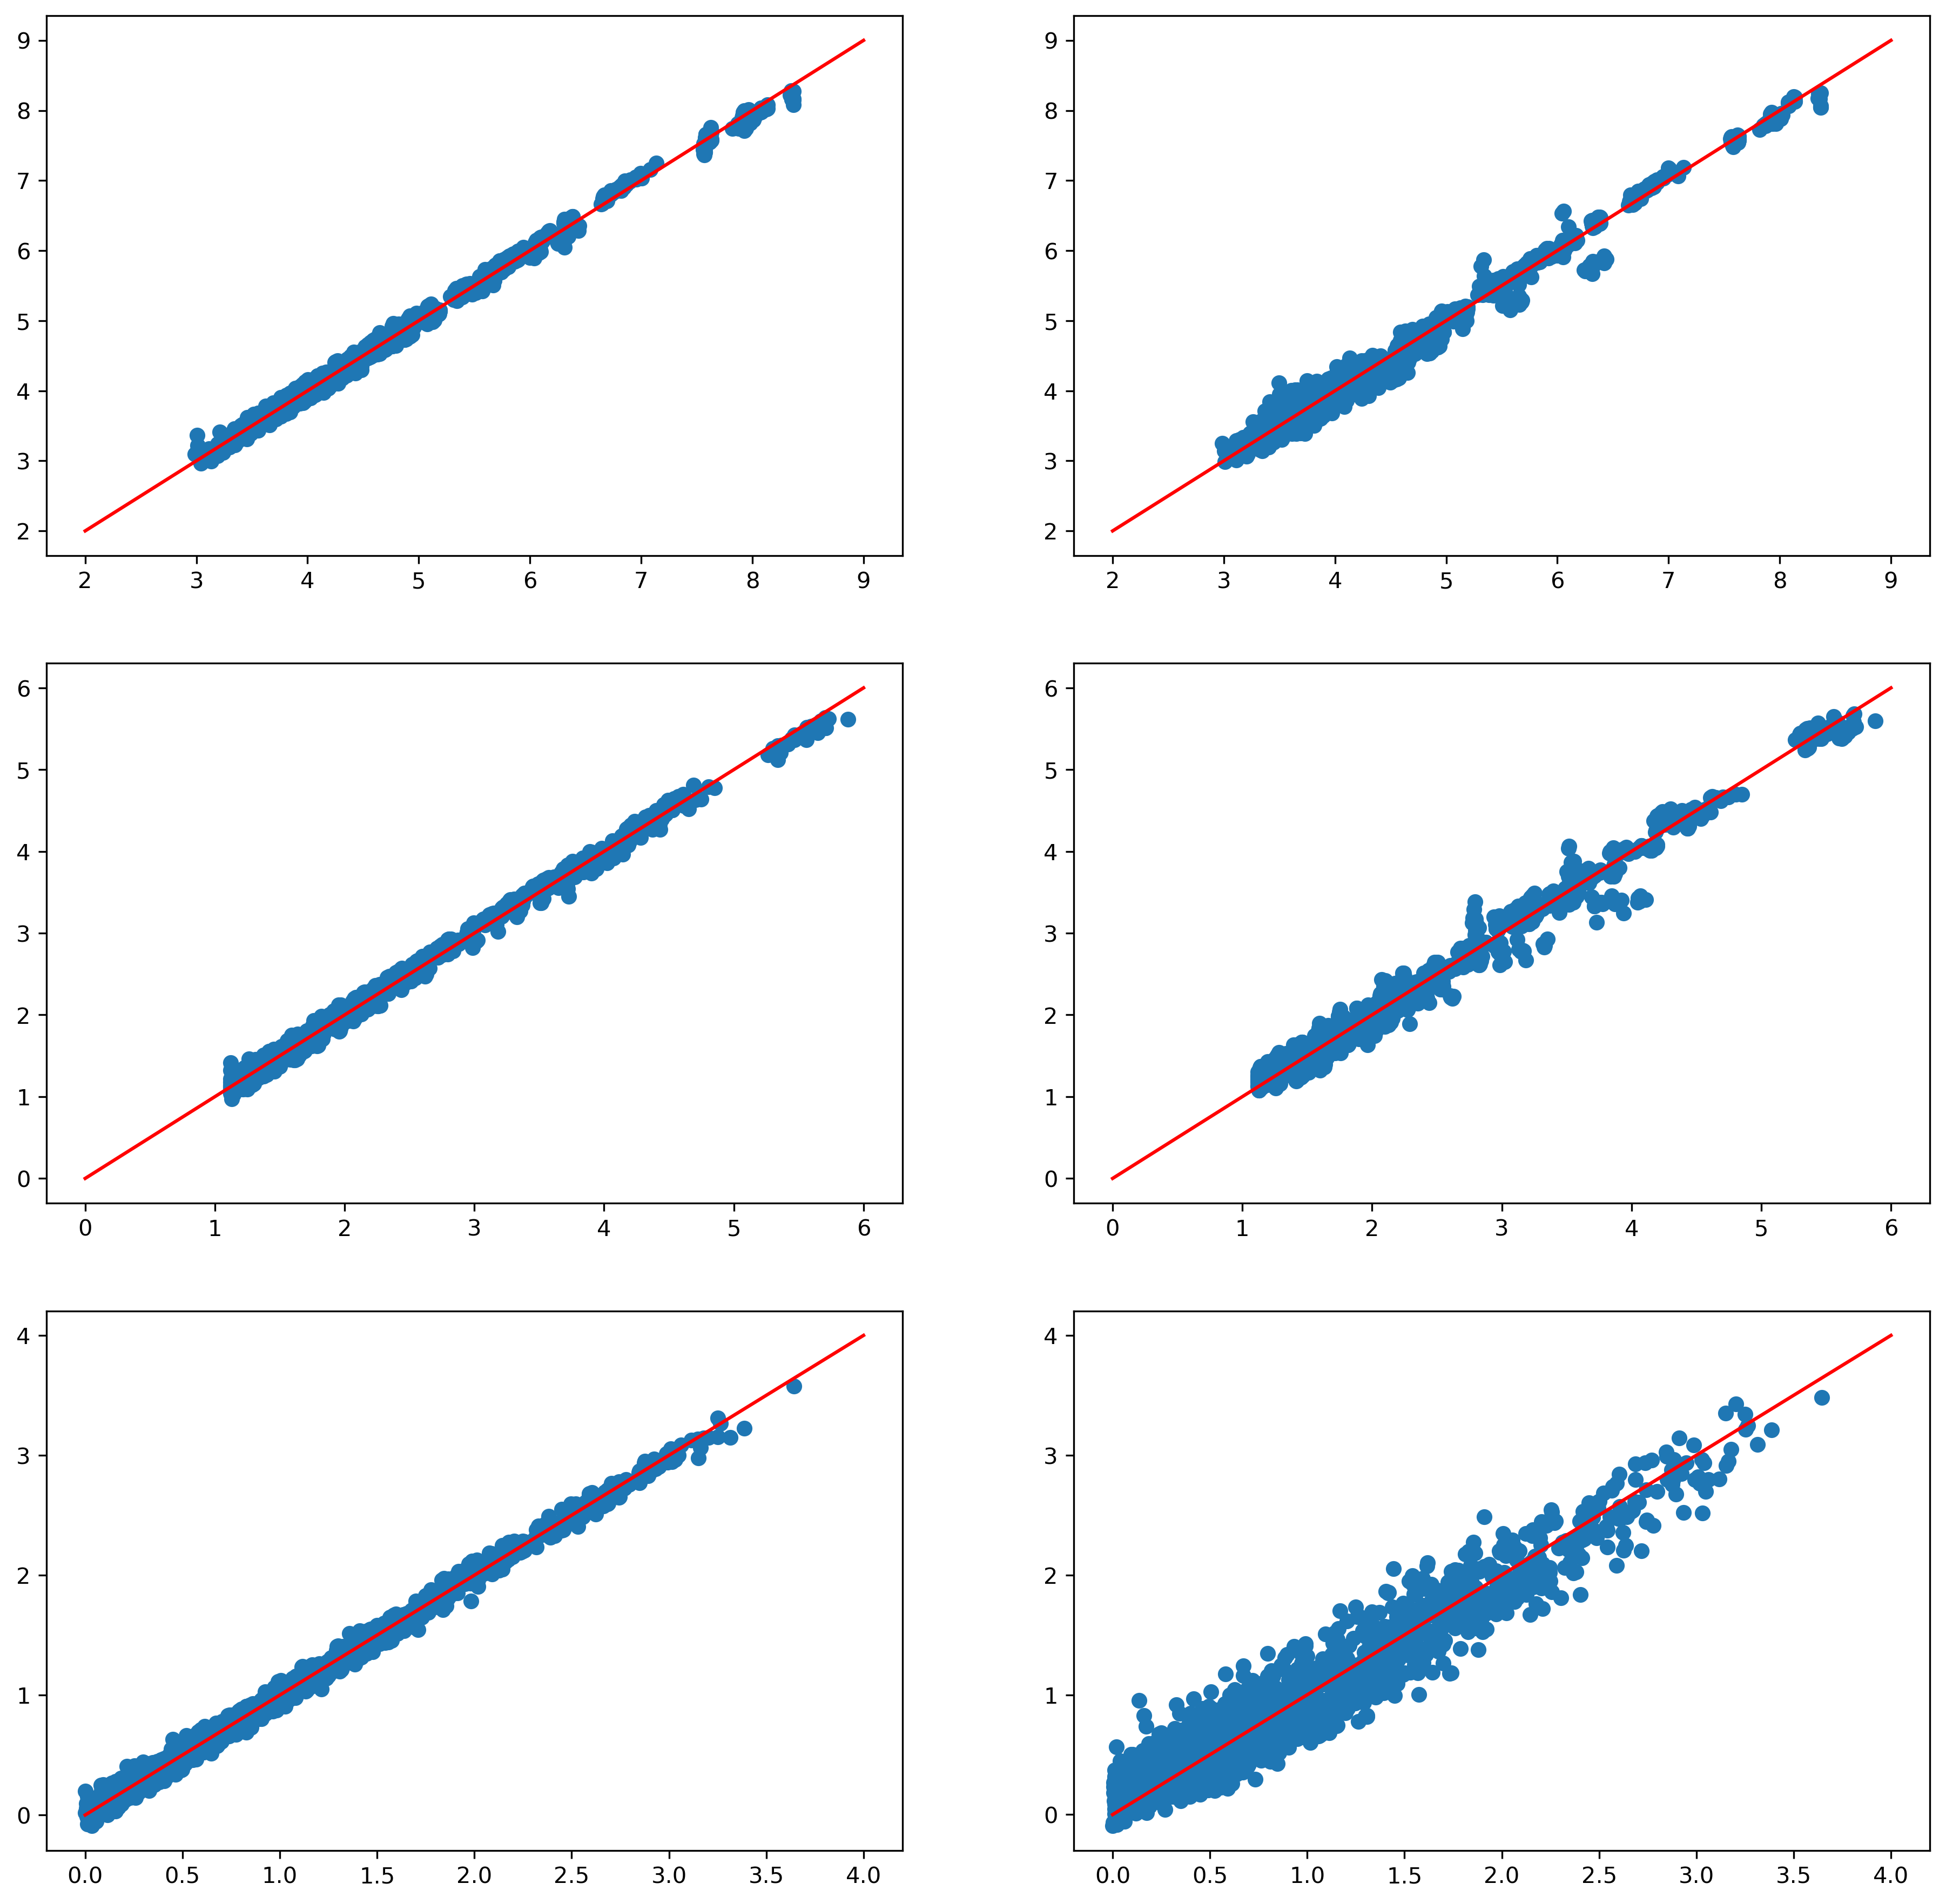

<Figure size 432x288 with 0 Axes>

In [72]:
plot_result(SVmodelA_pred, SVmodelN_pred)

In [73]:
performance_SRD 

name     R^2_A     MAE_A    MAPE_A    RMSE_A     R^2_N  \
0  Linear_Regression_SRD  0.770981  0.460799  0.095145  0.595463  0.762377   
1    Poly_Regression_SRD  0.999701  0.014615  0.003287   0.02151  0.992658   
2                KNN_SRD  0.834112  0.344652  0.065039  0.506788  0.982939   
3                 DT_SRD  0.996853  0.016904  0.004084  0.069802  0.994979   
4                 RF_SRD  0.999401  0.014886  0.003477  0.030463  0.998032   
5                 XG_SRD  0.999356  0.016319  0.003688  0.031583  0.998583   
6                 DN_SRD   0.99894  0.030251  0.006381  0.040502  0.987282   
7                 SV_SRD  0.996522  0.060836   0.01311  0.073376  0.988253   

      MAE_N    MAPE_N    RMSE_N  
0  0.475911  0.098839  0.606545  
1  0.077319  0.018364  0.106618  
2   0.08296  0.018815  0.162526  
3  0.016686  0.004044  0.088168  
4    0.0189  0.004668  0.055195  
5  0.023592  0.005653  0.046833  
6  0.102713  0.022558  0.140325  
7  0.096567  0.021752  0.134859

In [74]:
performance_ConSD

name     R^2_A     MAE_A    MAPE_A    RMSE_A     R^2_N  \
0  Linear_Regression_ConsSD  0.754278  0.420583  0.216392  0.541042  0.731907   
1    Poly_Regression_ConsSD  0.999616  0.014643  0.008463  0.021384  0.988222   
2                KNN_ConsSD  0.813114  0.318402  0.137074  0.471842   0.97633   
3                 DT_ConsSD  0.999193  0.007454  0.003953  0.030999   0.99849   
4                 RF_ConsSD  0.999766  0.008693  0.004504  0.016698  0.999091   
5                 XG_ConsSD  0.999596  0.010753  0.005314  0.021947   0.99929   
6                 DN_ConsSD  0.998764   0.02733  0.014054  0.038374  0.981571   
7                 SV_ConsSD  0.995443  0.061178  0.033704  0.073682  0.982607   

      MAE_N    MAPE_N    RMSE_N  
0  0.439423  0.230477  0.565135  
1  0.097006  0.054496  0.118452  
2   0.12271  0.065177  0.167923  
3  0.014513  0.005297  0.042412  
4  0.015143  0.006347  0.032905  
5  0.014175  0.005952  0.029077  
6  0.112306  0.059724  0.148169  
7  0.110182  0.059599  0.143944

In [75]:
performance_SCD 

name     R^2_A     MAE_A    MAPE_A    RMSE_A     R^2_N  \
0  Linear_Regression_SCD   0.86411   0.20999  1.021081  0.265856  0.675637   
1    Poly_Regression_SCD  0.999935  0.004272  0.027052   0.00582   0.92799   
2                KNN_SCD  0.928166  0.139437  0.780215  0.193293  0.910578   
3                 DT_SCD  0.942482   0.10842  0.376351  0.172963  0.905059   
4                 RF_SCD  0.977825  0.072179  0.465652  0.107395  0.939563   
5                 XG_SCD  0.984142  0.057751  0.334836  0.090819   0.96781   
6                 DN_SCD  0.995405  0.040225  0.243208  0.048888  0.923857   
7                 SV_SCD  0.993737  0.047019  0.275767  0.057075  0.919221   

      MAE_N    MAPE_N    RMSE_N  
0  0.326321  1.563443   0.41074  
1  0.155445  0.611523   0.19353  
2  0.158777  0.711755  0.215662  
3  0.151828  0.625237  0.222218  
4  0.130754  0.678012  0.177298  
5  0.090643  0.431548  0.129393  
6  0.163147  0.682893  0.199006  
7  0.168389  0.756183  0.204975

### Some initial evaluations

In [76]:
XA = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]

In [77]:
inp = np.array([30.1,0.318,54,4.46,0.137,90,9.79,18])

In [78]:
XA_train.iloc[0]

FG Temperature            50.0000
Lean Loading               0.2714
Lean Amine Temperature    30.0000
L/G (kg/kg)                4.1630
Flue gas CO2 cons          0.1324
CO2 Capture Efficiency    93.3100
LMTD                      12.0800
Abs Height                18.0000
Name: 4824, dtype: float64

In [79]:
type(inp)

numpy.ndarray

In [80]:
type(XA_train.iloc[0])

pandas.core.series.Series

In [81]:
inps = pd.Series(inp)

In [82]:
inps.shape

(8,)

In [83]:
XA_train.iloc[0].shape

(8,)

In [84]:
inp = np.array([40,0.25,35,3.6,0.1175,90.14,19.23,30])

In [85]:
SVmodelA.predict(inp.reshape(1, -1))

C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[5.10192776, 1.76778638, 2.38840773]])

In [86]:
DTmodelA.predict(inp.reshape(1, -1))

C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([[4.628     , 1.503     , 3.08356808]])

In [87]:
GBmodelA.predict(inp.reshape(1, -1))

NameError: name 'GBmodelA' is not defined

In [ ]:
ANmodelA.predict(scalerA.transform(inp.reshape(1, -1)))

### Outside evaluations

In [ ]:
ot = pd.read_excel('data/Series8_informat.xlsx')

In [ ]:
ot = ot[ot["LMTD"] > 0]

In [ ]:
ot = ot[ot["LA Chilling Duty"] >= 0]

In [ ]:
ot["SCD (MJ/kg)"] = (0.001 * ot["LA Chilling Duty"]) / ot["Captured CO2 (kg/h)"]

In [ ]:
ot_inp = ot[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]

In [ ]:
ot_out = ot[["SRD (MJ/kg CO2)", "Condensor Specific Duty", "SCD (MJ/kg)"]]

In [ ]:
SVmodelA_outpredict = SVmodelA.predict(ot_inp)
ANmodelA_outpredict = ANmodelA.predict(scalerA.transform(ot_inp))
GBmodelA_outpredict = GBmodelA.predict(ot_inp)

In [ ]:
print(mean_absolute_error(ot_out["SRD (MJ/kg CO2)"], SVmodelA_outpredict[: , 0]))
print(r2_score(ot_out["SRD (MJ/kg CO2)"], SVmodelA_outpredict[: , 0]))
print(mean_absolute_percentage_error(ot_out["SRD (MJ/kg CO2)"], SVmodelA_outpredict[: , 0]))

In [ ]:
print(mean_absolute_error(ot_out["Condensor Specific Duty"], SVmodelA_outpredict[: , 1]))
print(r2_score(ot_out["Condensor Specific Duty"], SVmodelA_outpredict[: , 1]))
print(mean_absolute_percentage_error(ot_out["Condensor Specific Duty"], SVmodelA_outpredict[: , 1]))

In [ ]:
print(mean_absolute_error(ot_out["SCD (MJ/kg)"], SVmodelA_outpredict[: , 2]))
print(r2_score(ot_out["SCD (MJ/kg)"], SVmodelA_outpredict[: , 2]))
print(mean_absolute_percentage_error(ot_out["SCD (MJ/kg)"], SVmodelA_outpredict[: , 2]))

In [ ]:
print(mean_absolute_error(ot_out["SRD (MJ/kg CO2)"], ANmodelA_outpredict[: , 0]))
print(r2_score(ot_out["SRD (MJ/kg CO2)"], ANmodelA_outpredict[: , 0]))
print(mean_absolute_percentage_error(ot_out["SRD (MJ/kg CO2)"], ANmodelA_outpredict[: , 0]))

In [ ]:
print(mean_absolute_error(ot_out["Condensor Specific Duty"], ANmodelA_outpredict[: , 1]))
print(r2_score(ot_out["Condensor Specific Duty"], ANmodelA_outpredict[: , 1]))
print(mean_absolute_percentage_error(ot_out["Condensor Specific Duty"], ANmodelA_outpredict[: , 1]))

In [ ]:
print(mean_absolute_error(ot_out["SCD (MJ/kg)"], ANmodelA_outpredict[: , 2]))
print(r2_score(ot_out["SCD (MJ/kg)"], ANmodelA_outpredict[: , 2]))
print(mean_absolute_percentage_error(ot_out["SCD (MJ/kg)"], ANmodelA_outpredict[: , 2]))

In [ ]:
print(mean_absolute_error(ot_out["SRD (MJ/kg CO2)"], GBmodelA_outpredict[: , 0]))
print(r2_score(ot_out["SRD (MJ/kg CO2)"], GBmodelA_outpredict[: , 0]))
print(mean_absolute_percentage_error(ot_out["SRD (MJ/kg CO2)"], GBmodelA_outpredict[: , 0]))

In [ ]:
print(mean_absolute_error(ot_out["Condensor Specific Duty"], GBmodelA_outpredict[: , 1]))
print(r2_score(ot_out["Condensor Specific Duty"], GBmodelA_outpredict[: , 1]))
print(mean_absolute_percentage_error(ot_out["Condensor Specific Duty"], GBmodelA_outpredict[: , 1]))

In [ ]:
print(mean_absolute_error(ot_out["SCD (MJ/kg)"], GBmodelA_outpredict[: , 2]))
print(r2_score(ot_out["SCD (MJ/kg)"], GBmodelA_outpredict[: , 2]))
print(mean_absolute_percentage_error(ot_out["SCD (MJ/kg)"], GBmodelA_outpredict[: , 2]))

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)
fig = plt.figure()

axes[0,0].plot(np.arange(1,10), np.arange(1,10), color = "red")
axes[0,0].scatter(ot_out["SRD (MJ/kg CO2)"], ANmodelA_outpredict[: , 0])

